### Customer Churn Analysis - 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load dataset
df=pd.read_excel('E Commerce Dataset.xlsx',sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


#### Know Your Data - 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i)
        print()
        print(df[i].value_counts())
        print()

PreferredLoginDevice

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

PreferredPaymentMode

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Gender

Male      3384
Female    2246
Name: Gender, dtype: int64

PreferedOrderCat

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

MaritalStatus

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



In [6]:
#replaced some name to avoide the confusion
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('Phone','Other')

In [7]:
#replaced some name to avoide the confusion
df['PreferedOrderCat']=df['PreferedOrderCat'].replace('Mobile','Mobile Accessories')

In [8]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Other,1,8.0,UPI,Male,3.0,4,Mobile Accessories,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Other,1,30.0,Debit Card,Male,2.0,4,Mobile Accessories,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Other,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Other,1,12.0,CC,Male,NaN,3,Mobile Accessories,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [9]:
#check missing values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [10]:
#column churn & citi tier is int type. convert it into object
df['Churn']=df['Churn'].astype('object')
df['CityTier']=df['CityTier'].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [12]:
missing_feat=[]
for i in df.columns:
    if df[i].isnull().sum()>0:
        missing_feat.append(i)
        print("The missing values in {} are - {} ".format(i,df[i].isnull().sum()))
        print("The data type of {} is {}".format(i,df[i].dtype))
        print()

The missing values in Tenure are - 264 
The data type of Tenure is float64

The missing values in WarehouseToHome are - 251 
The data type of WarehouseToHome is float64

The missing values in HourSpendOnApp are - 255 
The data type of HourSpendOnApp is float64

The missing values in OrderAmountHikeFromlastYear are - 265 
The data type of OrderAmountHikeFromlastYear is float64

The missing values in CouponUsed are - 256 
The data type of CouponUsed is float64

The missing values in OrderCount are - 258 
The data type of OrderCount is float64

The missing values in DaySinceLastOrder are - 307 
The data type of DaySinceLastOrder is float64



<AxesSubplot:>

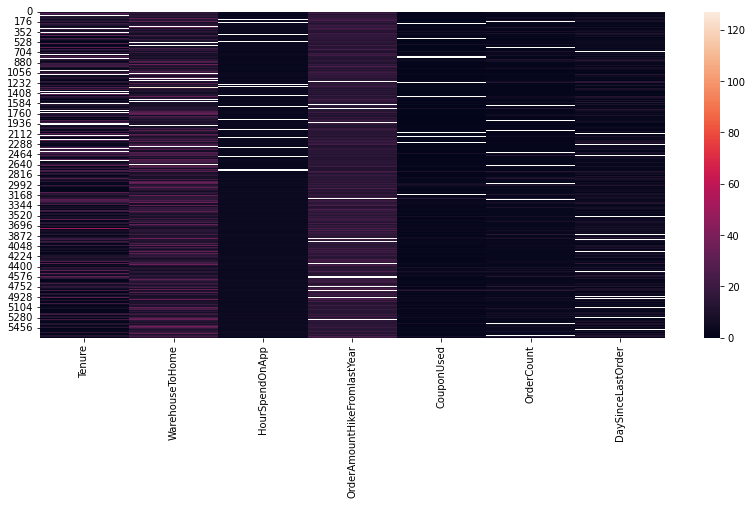

In [13]:
#plot heatmap for the missing values
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.heatmap(df[missing_feat])

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00


### Fill missing values - 

As we see above the mean & median are almost equal so we replace the filling values with mean.

In [15]:
#fill missing values
for i in df[missing_feat]:
    if df[i].isnull().sum()>0:
        df[i]=df[i].fillna(round(np.mean(df[i]),2))

In [16]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00,Mobile Phone,3,6.0,Debit Card,Female,3.00,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,10.19,Other,1,8.0,UPI,Male,3.00,4,Mobile Accessories,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,10.19,Other,1,30.0,Debit Card,Male,2.00,4,Mobile Accessories,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.00,Other,3,15.0,Debit Card,Male,2.00,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.00,Other,1,12.0,CC,Male,2.93,3,Mobile Accessories,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   object 
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [18]:
df.drop('CustomerID',axis=1,inplace=True)

In [19]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [21]:
#seperating the categorical columns for analysis
cat_col=[feat for feat in df.columns if df[feat].dtype=='O']
cat_col

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [22]:
#seperating the numerical columns for analysis
num_col=[feat for feat in df.columns if df[feat].dtype!='O']
num_col

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [23]:
#categorical columns analysis
df[cat_col].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [24]:
#numerical columns analysis
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.189904,8.354164,0.0,3.00,9.00,15.0000,61.00
WarehouseToHome,5630.0,15.639901,8.339095,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.931465,0.705384,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5630.0,15.708020,3.587926,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.750977,1.851038,0.0,1.00,1.00,2.0000,16.00
OrderCount,5630.0,3.008096,2.871521,1.0,1.00,2.00,3.0100,16.00


In [25]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.00,Mobile Phone,3,6.0,Debit Card,Female,3.00,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10.19,Other,1,8.0,UPI,Male,3.00,4,Mobile Accessories,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,10.19,Other,1,30.0,Debit Card,Male,2.00,4,Mobile Accessories,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.00,Other,3,15.0,Debit Card,Male,2.00,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.00,Other,1,12.0,CC,Male,2.93,3,Mobile Accessories,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [26]:
df1=df.copy()

In [27]:
#correlation between numerical columns.
df[num_col].corr()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Tenure,1.000000,-0.017301,-0.019400,-0.023506,-0.013627,0.232337,-0.020780,0.004941,0.119202,0.175935,0.175001,0.460494
WarehouseToHome,-0.017301,1.000000,0.058617,0.018640,0.007537,-0.010782,0.027969,0.036994,-0.003638,0.002233,0.016896,-0.008952
HourSpendOnApp,-0.019400,0.058617,1.000000,0.307808,0.031161,0.141785,0.006829,0.101907,0.183010,0.104670,0.071555,0.118745
NumberOfDeviceRegistered,-0.023506,0.018640,0.307808,1.000000,-0.017228,0.084997,0.003407,0.068155,0.148644,0.100317,0.017723,0.137183
SatisfactionScore,-0.013627,0.007537,0.031161,-0.017228,1.000000,0.053583,-0.031115,-0.027086,0.017532,0.019336,0.031164,0.003473
NumberOfAddress,0.232337,-0.010782,0.141785,0.084997,0.053583,1.000000,-0.026399,0.015142,0.041190,-0.007362,-0.063057,0.186688
Complain,-0.020780,0.027969,0.006829,0.003407,-0.031115,-0.026399,1.000000,-0.004430,-0.007987,-0.018785,-0.042378,0.000525
OrderAmountHikeFromlastYear,0.004941,0.036994,0.101907,0.068155,-0.027086,0.015142,-0.004430,1.000000,0.029725,0.020598,0.005820,0.014622
CouponUsed,0.119202,-0.003638,0.183010,0.148644,0.017532,0.041190,-0.007987,0.029725,1.000000,0.663205,0.321452,0.257246
OrderCount,0.175935,0.002233,0.104670,0.100317,0.019336,-0.007362,-0.018785,0.020598,0.663205,1.000000,0.447478,0.344773


In [28]:
#covariance between numerical columns.
df[num_col].cov()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Tenure,69.792058,-1.205300,-0.114323,-0.201085,-0.157121,5.014693,-0.078365,0.148093,1.843321,4.220537,5.195002,189.301612
WarehouseToHome,-1.205300,69.540501,0.344799,0.159173,0.086743,-0.232304,0.105283,1.106861,-0.056150,0.053468,0.500676,-3.673525
HourSpendOnApp,-0.114323,0.344799,0.497567,0.222334,0.030337,0.258391,0.002174,0.257914,0.238954,0.212012,0.179352,4.121622
NumberOfDeviceRegistered,-0.201085,0.159173,0.222334,1.048573,-0.024349,0.224866,0.001575,0.250402,0.281748,0.294975,0.064487,6.912367
SatisfactionScore,-0.157121,0.086743,0.030337,-0.024349,1.904937,0.191068,-0.019386,-0.134130,0.044792,0.076635,0.152840,0.235886
NumberOfAddress,5.014693,-0.232304,0.258391,0.224866,0.191068,6.674914,-0.030788,0.140360,0.196984,-0.054620,-0.578891,23.733771
Complain,-0.078365,0.105283,0.002174,0.001575,-0.019386,-0.030788,0.203769,-0.007174,-0.006674,-0.024350,-0.067975,0.011661
OrderAmountHikeFromlastYear,0.148093,1.106861,0.257914,0.250402,-0.134130,0.140360,-0.007174,12.873213,0.197412,0.212219,0.074199,2.581570
CouponUsed,1.843321,-0.056150,0.238954,0.281748,0.044792,0.196984,-0.006674,0.197412,3.426340,3.525129,2.114331,23.431008
OrderCount,4.220537,0.053468,0.212012,0.294975,0.076635,-0.054620,-0.024350,0.212219,3.525129,8.245631,4.565890,48.716099


In [29]:
#skewness between numerical columns.
df[num_col].skew()

Tenure                         0.754402
WarehouseToHome                1.656478
HourSpendOnApp                -0.027555
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
Complain                       0.953347
OrderAmountHikeFromlastYear    0.809988
CouponUsed                     2.605623
OrderCount                     2.248415
DaySinceLastOrder              1.225005
CashbackAmount                 1.149846
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Churn'),
  Text(1, 0, 'Tenure'),
  Text(2, 0, 'CityTier'),
  Text(3, 0, 'WarehouseToHome'),
  Text(4, 0, 'HourSpendOnApp'),
  Text(5, 0, 'NumberOfDeviceRegistered'),
  Text(6, 0, 'SatisfactionScore'),
  Text(7, 0, 'NumberOfAddress'),
  Text(8, 0, 'Complain'),
  Text(9, 0, 'OrderAmountHikeFromlastYear'),
  Text(10, 0, 'CouponUsed'),
  Text(11, 0, 'OrderCount'),
  Text(12, 0, 'DaySinceLastOrder'),
  Text(13, 0, 'CashbackAmount')])

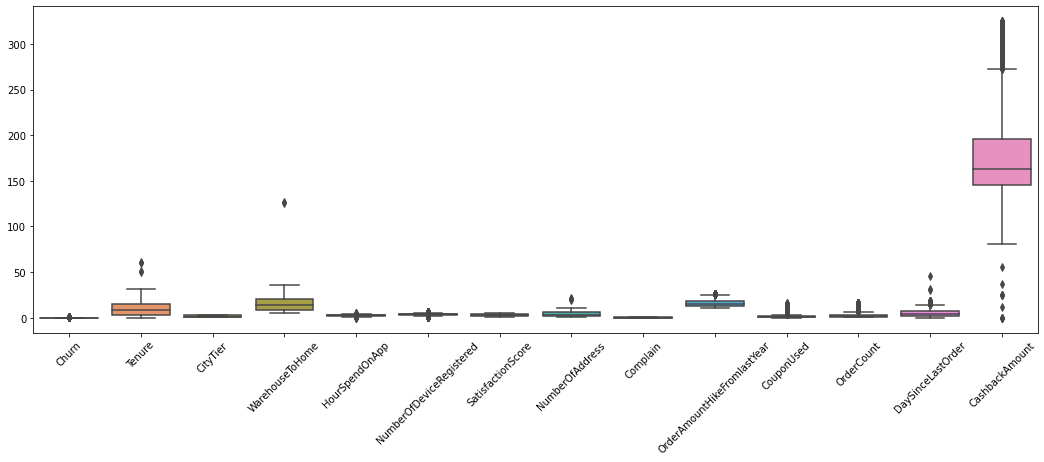

In [30]:
#plotting the boxplot to find the outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)

### Handling Outliers - 

In [31]:
def rem_outliers(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    ur=Q3+(1.5*IQR)
    lr=Q1-(1.5*IQR)
    return lr,ur

In [32]:
#replacing the outliers with the upper limit & lower limit
for i in df.columns:
    if df[i].dtype!='object':
        lr,ur=rem_outliers(df[i])
        df[i]=np.where(df[i] > ur,ur,df[i])
        df[i]=np.where(df[i] < lr,lr,df[i])
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.00,Mobile Phone,3,6.0,Debit Card,Female,3.00,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,1,10.19,Other,1,8.0,UPI,Male,3.00,4.0,Mobile Accessories,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,1,10.19,Other,1,30.0,Debit Card,Male,2.00,4.0,Mobile Accessories,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,1,0.00,Other,3,15.0,Debit Card,Male,2.00,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,1,0.00,Other,1,12.0,CC,Male,2.93,3.0,Mobile Accessories,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Churn'),
  Text(1, 0, 'Tenure'),
  Text(2, 0, 'CityTier'),
  Text(3, 0, 'WarehouseToHome'),
  Text(4, 0, 'HourSpendOnApp'),
  Text(5, 0, 'NumberOfDeviceRegistered'),
  Text(6, 0, 'SatisfactionScore'),
  Text(7, 0, 'NumberOfAddress'),
  Text(8, 0, 'Complain'),
  Text(9, 0, 'OrderAmountHikeFromlastYear'),
  Text(10, 0, 'CouponUsed'),
  Text(11, 0, 'OrderCount'),
  Text(12, 0, 'DaySinceLastOrder'),
  Text(13, 0, 'CashbackAmount')])

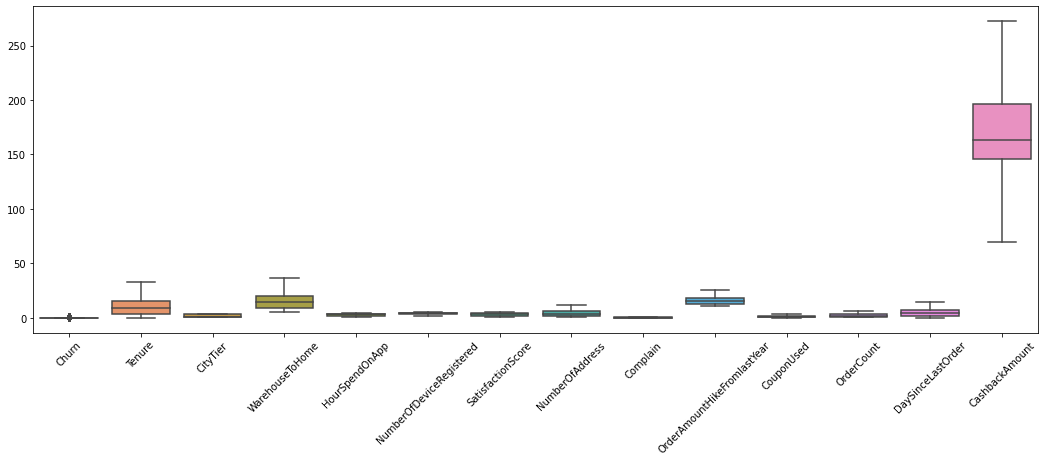

In [33]:
#boxplot to check the removal of outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)

### Feature Engineering - 

In [34]:
df['avr_cashback_per_order']=df['CashbackAmount']/df['OrderCount']

In [35]:
#avr_cashback_per_order added so num col updated
num_col=[feat for feat in df.columns if df[feat].dtype!='O']
num_col

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'avr_cashback_per_order']

In [36]:
churn_precentage=round(df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count(),2)
churn_precentage

20.25

In [37]:
#look for a duplicate values in data
df.loc[df.duplicated(),:]

#we do not remove this duplicate values because some features might get repeated but it shows the purchase of a customer which could be same.

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avr_cashback_per_order
1347,1,10.19,Other,1,8.0,UPI,Male,3.0,4.0,Mobile Accessories,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.900
1359,1,10.19,Other,1,30.0,Debit Card,Male,2.0,4.0,Mobile Accessories,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.280
1395,1,11.00,Mobile Phone,1,6.0,Debit Card,Male,3.0,4.0,Fashion,3.0,Single,10.0,1.0,13.0,0.0,1.0,0.0,153.81,153.810
1456,1,0.00,Computer,1,13.0,Debit Card,Male,3.0,5.0,Laptop & Accessory,3.0,Single,2.0,1.0,24.0,1.0,1.0,6.0,160.74,160.740
1485,1,0.00,Other,1,15.0,Credit Card,Female,2.0,3.0,Mobile Phone,5.0,Single,8.0,0.0,22.0,1.0,1.0,4.0,142.00,142.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,0,12.00,Mobile Phone,3,17.0,Debit Card,Female,4.0,4.0,Laptop & Accessory,1.0,Married,3.0,0.0,12.0,1.0,2.0,10.0,178.43,89.215
5613,0,10.00,Mobile Phone,3,18.0,E wallet,Female,4.0,5.0,Laptop & Accessory,1.0,Married,6.0,0.0,14.0,2.0,2.0,1.0,191.52,95.760
5620,0,3.00,Mobile Phone,1,35.0,Credit Card,Female,4.0,5.0,Mobile Phone,5.0,Single,3.0,0.0,15.0,1.0,2.0,5.0,162.85,81.425
5625,0,10.00,Computer,1,30.0,Credit Card,Male,3.0,2.0,Laptop & Accessory,1.0,Married,6.0,0.0,18.0,1.0,2.0,4.0,150.71,75.355


# EDA - 

### Univariate Analysis - 

In [38]:
cat_col

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

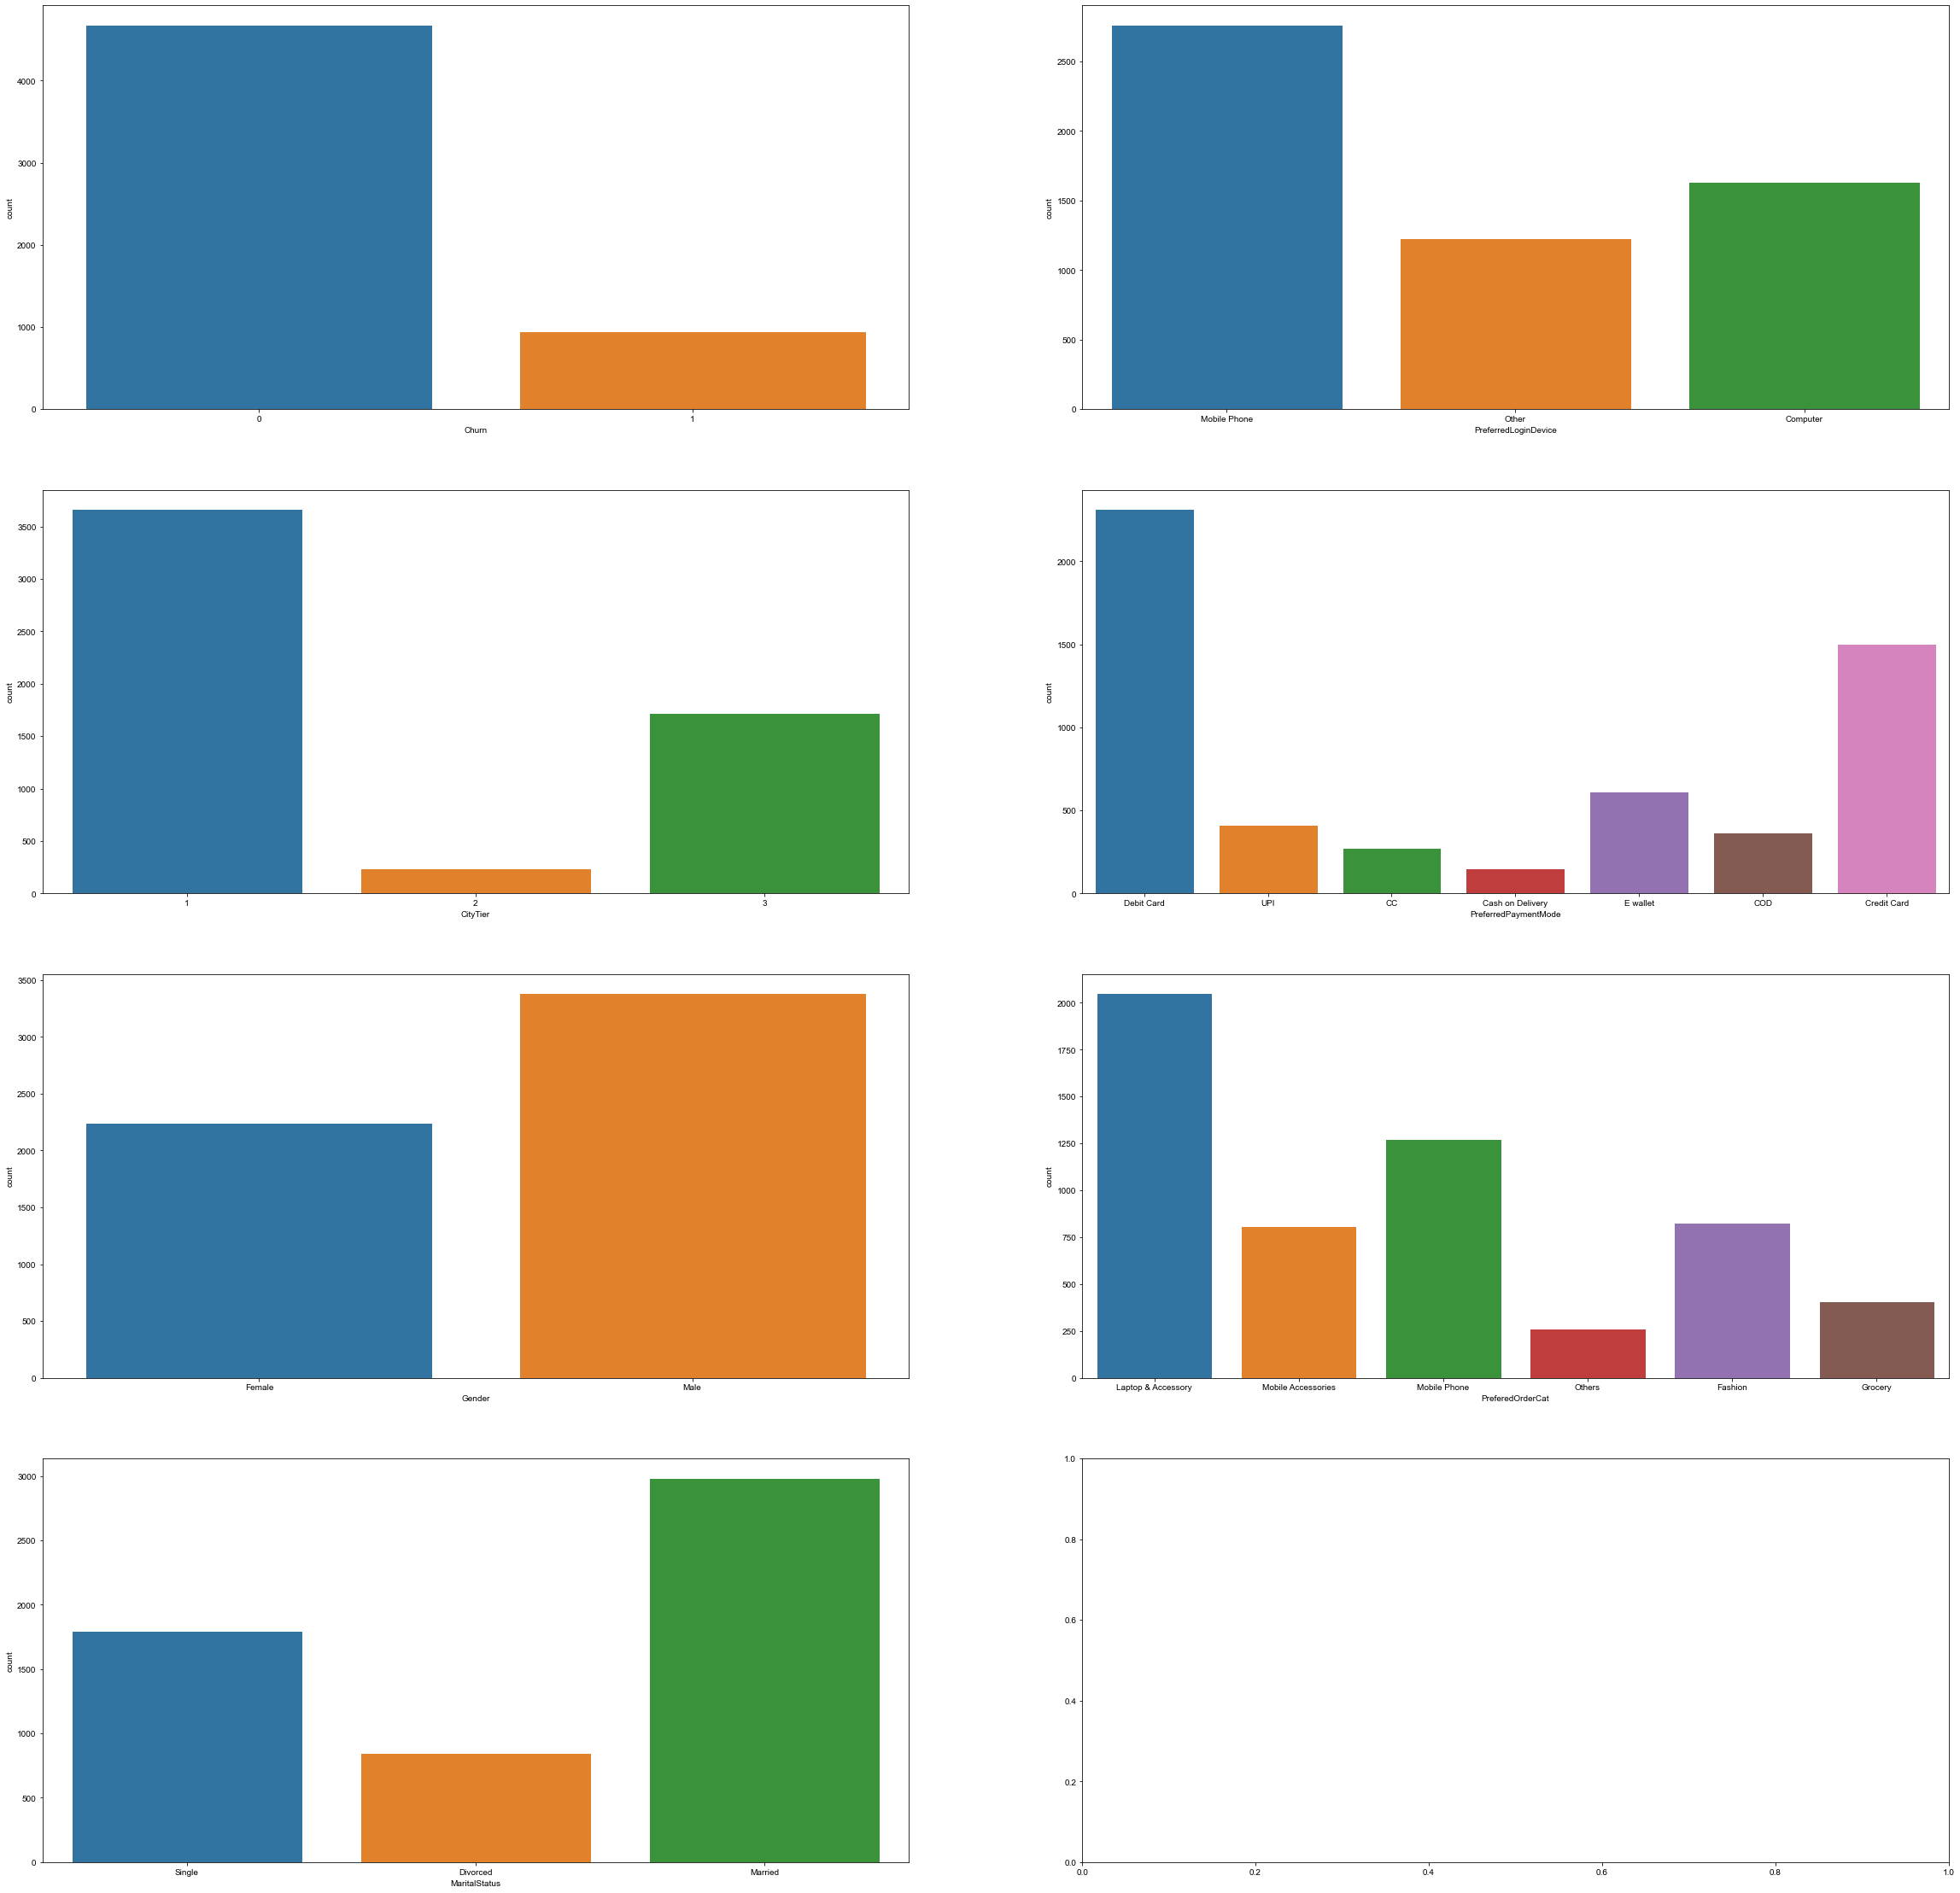

In [39]:
#countplot for the categorical columns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,2,figsize=(40,40))
sns.set(font_scale=1.5,style="white", palette=None)
for i,subplot in zip(cat_col,ax.flatten()):
    sns.countplot(df[i],ax=subplot)
    

array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'WarehouseToHome'}>,
        <AxesSubplot:title={'center':'HourSpendOnApp'}>,
        <AxesSubplot:title={'center':'NumberOfDeviceRegistered'}>],
       [<AxesSubplot:title={'center':'SatisfactionScore'}>,
        <AxesSubplot:title={'center':'NumberOfAddress'}>,
        <AxesSubplot:title={'center':'Complain'}>,
        <AxesSubplot:title={'center':'OrderAmountHikeFromlastYear'}>],
       [<AxesSubplot:title={'center':'CouponUsed'}>,
        <AxesSubplot:title={'center':'OrderCount'}>,
        <AxesSubplot:title={'center':'DaySinceLastOrder'}>,
        <AxesSubplot:title={'center':'CashbackAmount'}>],
       [<AxesSubplot:title={'center':'avr_cashback_per_order'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

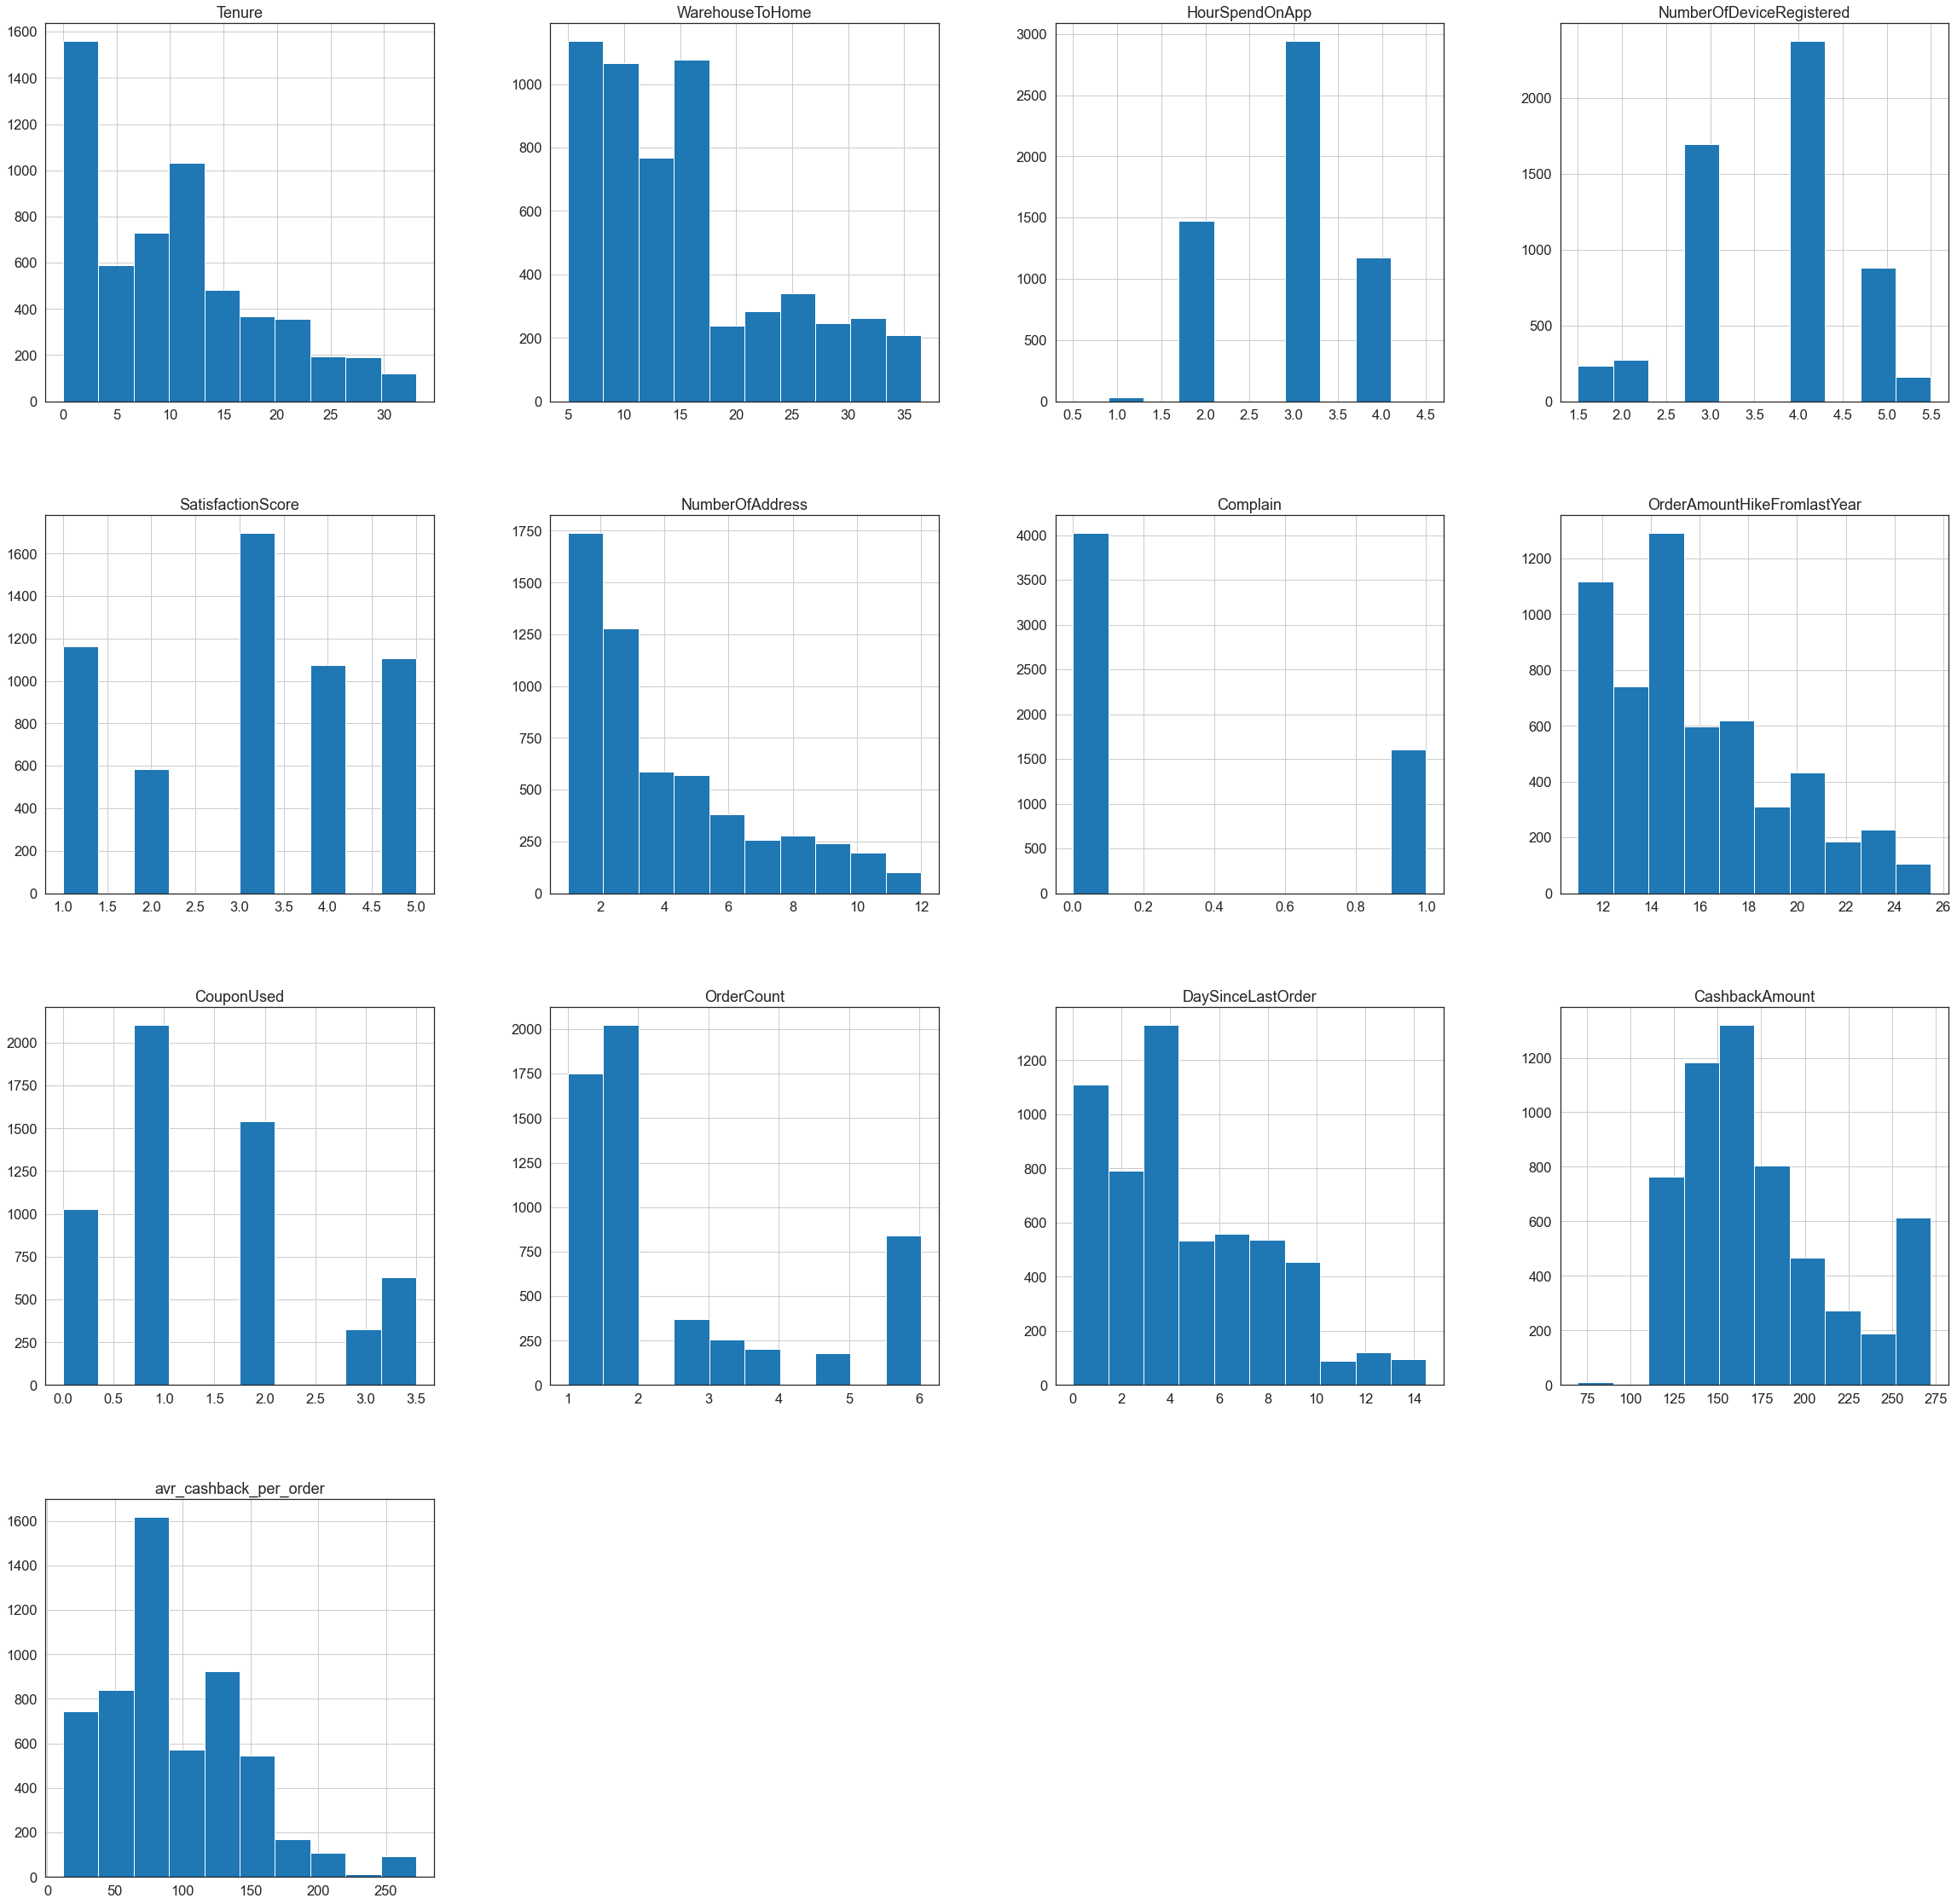

In [40]:
# Histograms for the numerical data
import matplotlib.pyplot as plt
df[num_col].hist(figsize=(40,40))

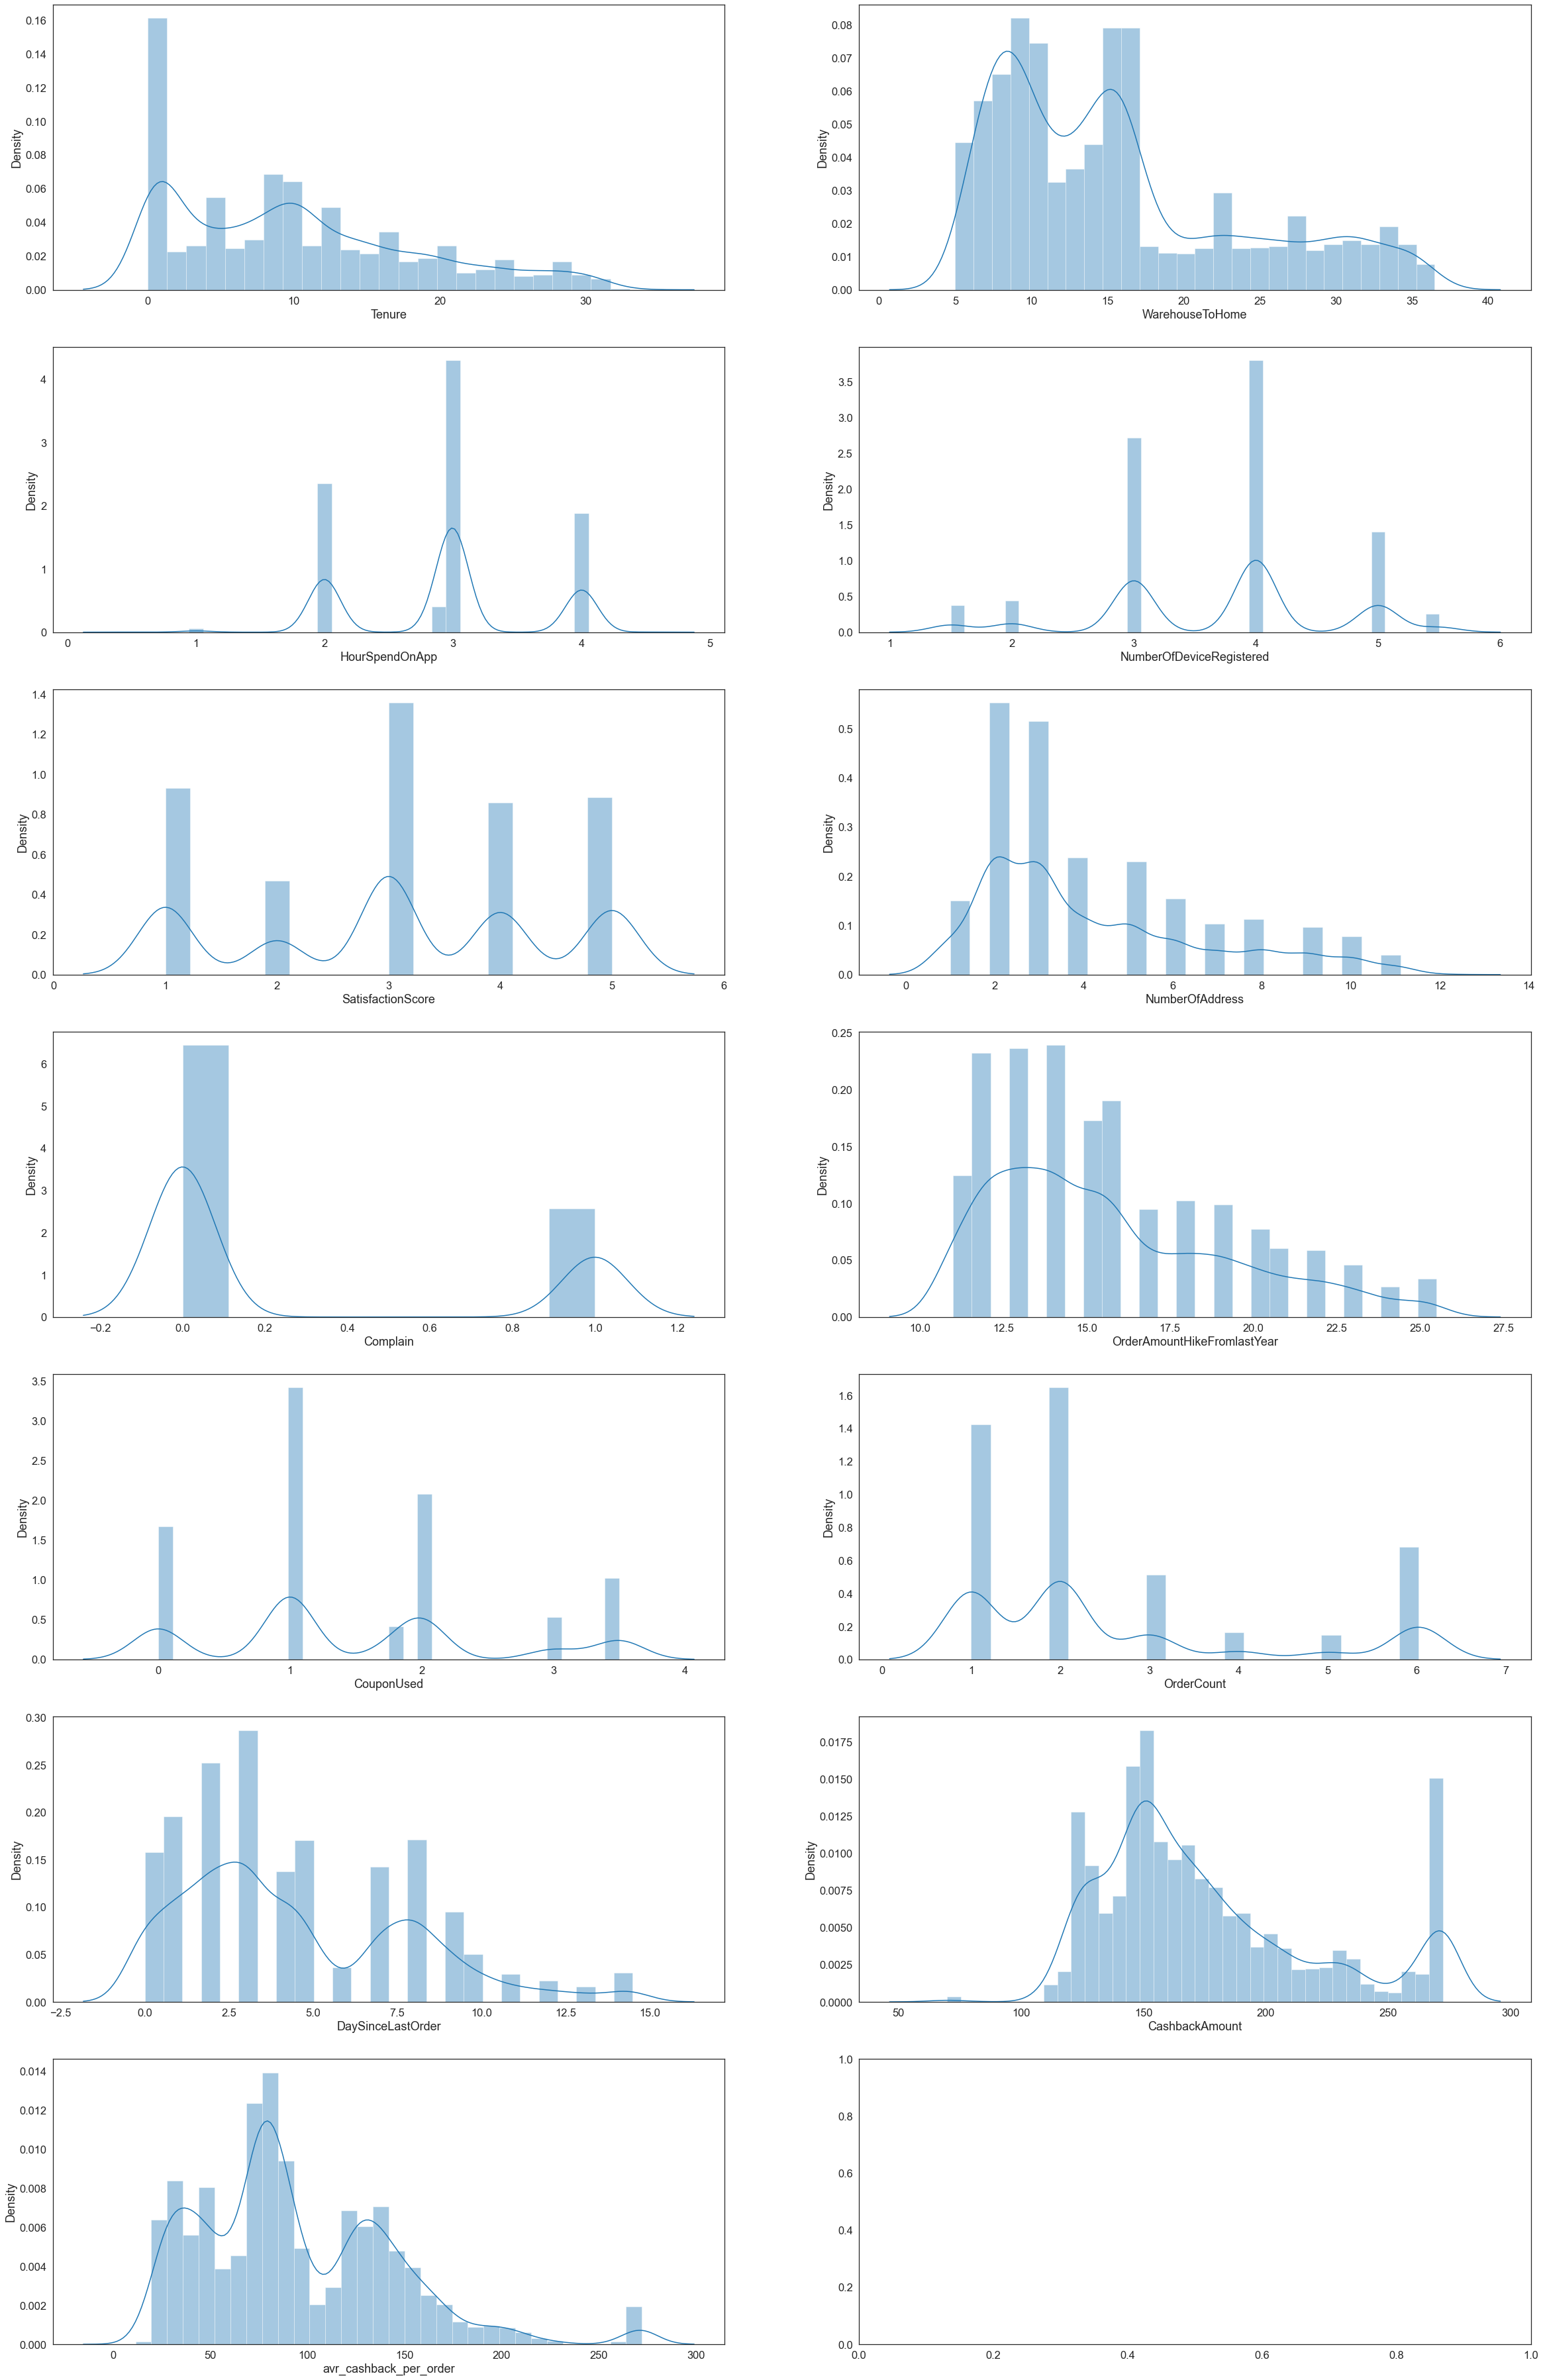

In [41]:
#distribution plot to check the distribution of data
import matplotlib.pyplot as plt
fig,ax=plt.subplots(7,2,figsize=(40,65))
sns.set(font_scale=2,style="white", palette=None)
for i,subplot in zip(num_col,ax.flatten()):
    sns.distplot(df[i],ax=subplot)

## Bivariate Analysis - 

We analyse the customer churn, total customers & % of customer churn with respective to each of the feature.

In [42]:
#defining a function to analyse each columns & its elements with customer churn.

D={}

for i in df.columns:
    d1=df.groupby(i).Churn.sum()
    d2=df[i].value_counts()
    d3=(df.groupby(i).Churn.sum()/df[i].value_counts())*100
    D[i]=pd.concat([d1,d2,d3],axis=1)
    D[i].reset_index(level=0,inplace=True)
    D[i]=D[i].rename(columns={'index':i,'Churn':'Customers_Churned',i:'Total_Customers',0:'Perc_Customer_Churn'})

In [130]:
#define function to plot the churn ve all the variables.
import matplotlib.pyplot as plt
def plot_churn(column):
    
    #define the figure size
    plt.figure(figsize=(45,15))
    fig,ax=plt.subplots()
    
    #title of the graph
    titles='Customer Churn analysed by '+ column
    plt.title(titles,fontsize=18)
    
    #define lines on y-axis
    line1=ax.plot(D[column][column],D[column]['Total_Customers'], color='deepskyblue', label = 'Total Customers')
    line2=ax.plot(D[column][column],D[column]['Customers_Churned'], color='red', label = 'Customers_Churned')
    
    #Label X axis & y axis
    plt.xlabel(column,fontsize=16)
    plt.ylabel("No of Customers",fontsize=16)
    
    #creating another axis for new y label
    ax2=ax.twinx()
    
    #define line for precentage of customer churn 
    line3=ax2.plot(D[column][column],D[column]['Perc_Customer_Churn'], color='navy', label = 'Churn as Percent of total')
    plt.ylabel('Perc_Customer_Churn',fontsize=16)
    
    #defining new line for the average customer churn
    y=0*D[column]['Total_Customers']+20.25
    line4=ax2.plot(D[column][column],y, color='orangered', label='Average customer Churn', linestyle='dashed')
    
    ax.tick_params(axis='both', labelsize=14,rotation=45)
    ax2.tick_params(axis='both', labelsize=14,rotation=45)
    
    #adding lines to define the legend
    lines = line1+line2+line3+line4
    labs = [l.get_label() for l in lines]
    plt.legend(lines, labs,fontsize=17,bbox_to_anchor=(2, 1))
       
   
    

In [131]:
columns=['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']

,Tenure,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,0.00,272,508,53.543307
1,1.00,349,690,50.57971
2,2.00,14,167,8.383234
3,3.00,18,195,9.230769
4,4.00,20,203,9.852217
5,5.00,16,204,7.843137
6,6.00,8,183,4.371585
7,7.00,16,221,7.239819
8,8.00,16,263,6.08365
9,9.00,12,247,4.8583


<Figure size 3240x1080 with 0 Axes>

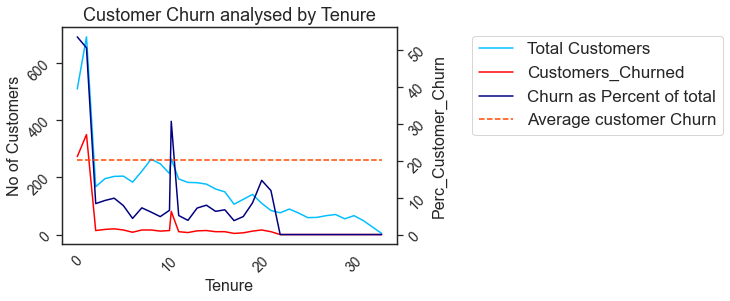

In [191]:
plot_churn('Tenure')
D['Tenure']

#1. we can observe below the customer churn rate goes down as the tenure increases.
#2. At tenure days between 10-12 the churn rate increased above the avg rate
#3. As the customer passes tenure days more that 20 the churn rate will goes down to zero. that means the customers whos tenure is more than
#20 days can be considered as loyal customer.

,CityTier,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,1,532,3666,14.511729
1,2,48,242,19.834711
2,3,368,1722,21.370499


<Figure size 3240x1080 with 0 Axes>

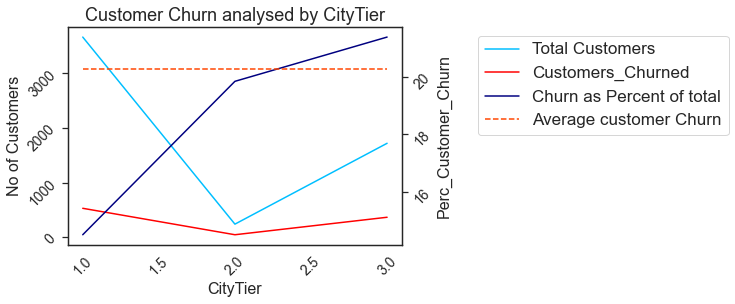

In [133]:
plot_churn('CityTier')
D['CityTier']

#1. The max customer churn is from tier 1 city but the total customers are also high from tier 1 city.
#2. The total customers are less in Tier 2 city so less the churn rate.
#3. Tier 3 city has comparativelt more customers that tier 2 so that the churn rate also increased.

,WarehouseToHome,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,5.00,1,8,12.5
1,6.00,34,295,11.525424
2,7.00,49,389,12.596401
3,8.00,58,444,13.063063
4,9.00,80,559,14.31127
5,10.00,44,274,16.058394
6,11.00,32,233,13.733906
7,12.00,30,221,13.574661
8,13.00,30,249,12.048193
9,14.00,40,299,13.377926


<Figure size 3240x1080 with 0 Axes>

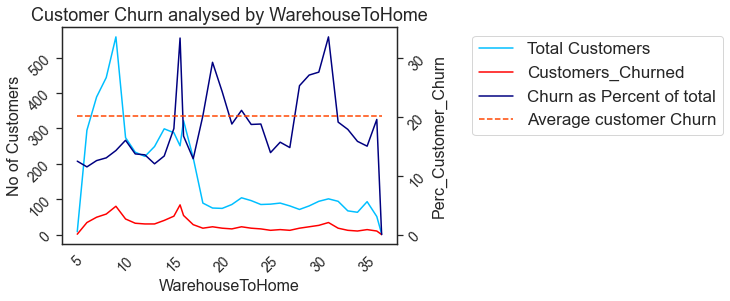

In [134]:
plot_churn('WarehouseToHome')
D['WarehouseToHome']

#1. The max customers are within the 15-17 km range from the home.
#2. The customers which are more than 15km away from the warehouse are more likely to be loyal.

,PreferredPaymentMode,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,CC,59,273,21.611722
1,COD,105,365,28.767123
2,Cash on Delivery,23,149,15.436242
3,Credit Card,193,1501,12.858095
4,Debit Card,356,2314,15.384615
5,E wallet,140,614,22.801303
6,UPI,72,414,17.391304


<Figure size 3240x1080 with 0 Axes>

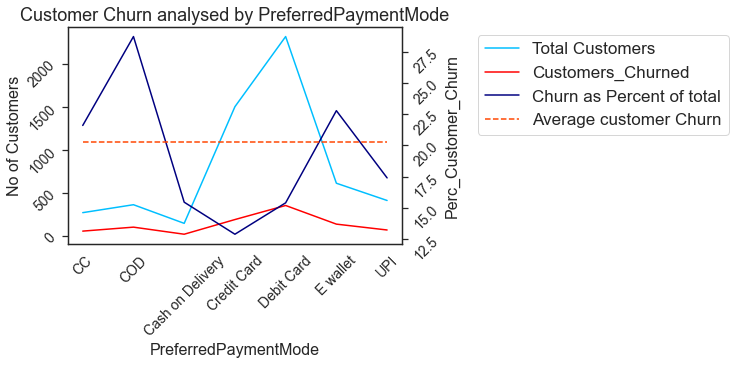

In [135]:
plot_churn('PreferredPaymentMode')
D['PreferredPaymentMode']

#1. most of the customers uses credit card & debit card also the churn rate is below the average rate.
#2. The churn rate per customer is more for COD. so business should more focus on offering discounts on credit cards & debit cards.

,Gender,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,Female,348,2246,15.494212
1,Male,600,3384,17.730496


<Figure size 3240x1080 with 0 Axes>

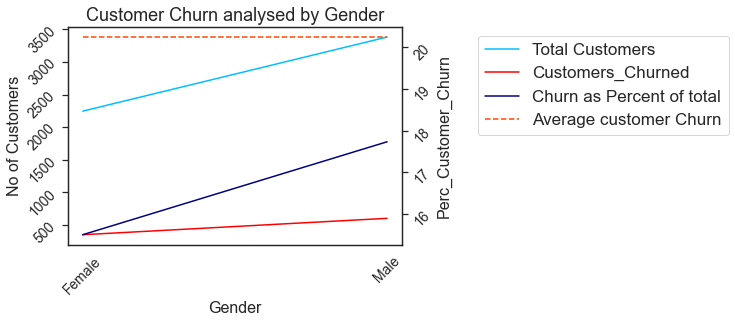

In [136]:
plot_churn('Gender')
D['Gender']

#The gender wise customers are comparetively same and male customers are more likely to be churned.
# The churn rate for both the genders is below avg.

,HourSpendOnApp,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,0.50,0,3,0.0
1,1.00,0,35,0.0
2,2.00,232,1471,15.771584
3,2.93,58,255,22.745098
4,3.00,460,2687,17.119464
5,4.00,198,1176,16.836735
6,4.50,0,3,0.0


<Figure size 3240x1080 with 0 Axes>

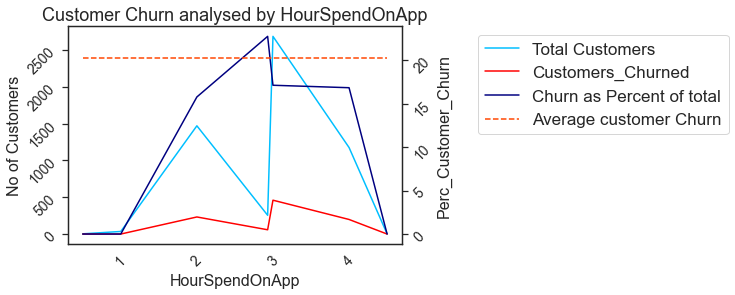

In [137]:
plot_churn('HourSpendOnApp')
D['HourSpendOnApp']

#1. Almost 50-55% of the customers spend more than 3 hrs on the app and are less likely to be churned.
#2. The churn per customer is more for the cusomer who spend 2-3 hrs on app.

,NumberOfDeviceRegistered,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,1.5,22,235,9.361702
1,2.0,26,276,9.42029
2,3.0,254,1699,14.949971
3,4.0,392,2377,16.491376
4,5.0,198,881,22.474461
5,5.5,56,162,34.567901


<Figure size 3240x1080 with 0 Axes>

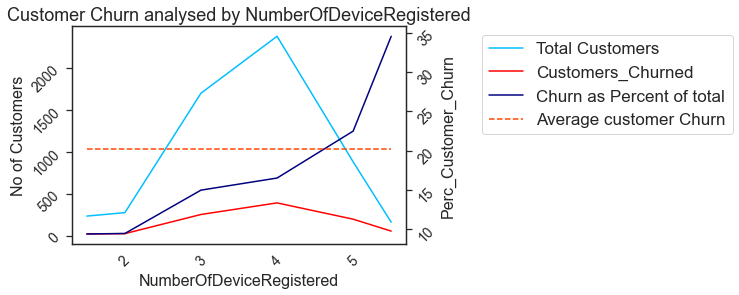

In [138]:
plot_churn('NumberOfDeviceRegistered')
D['NumberOfDeviceRegistered']



,PreferedOrderCat,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,Fashion,128,826,15.496368
1,Grocery,20,410,4.878049
2,Laptop & Accessory,210,2050,10.243902
3,Mobile Accessories,220,809,27.194067
4,Mobile Phone,350,1271,27.537372
5,Others,20,264,7.575758


<Figure size 3240x1080 with 0 Axes>

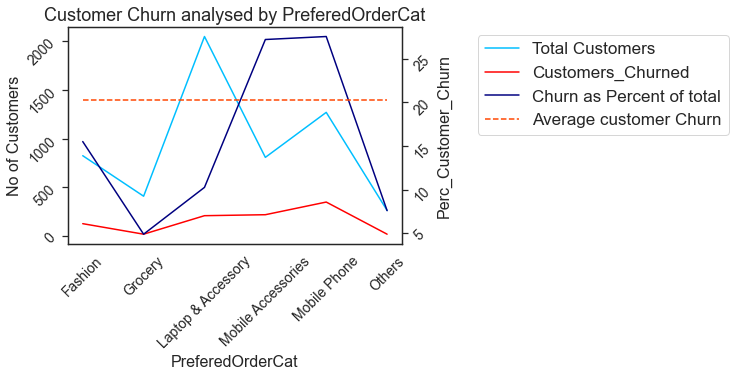

In [139]:
plot_churn('PreferedOrderCat')
D['PreferedOrderCat']

#1. Most of the customers buy Laptop & accessories and have less churn rate for the same category.
#2. The churn rate is high for the mobile phones category.

,SatisfactionScore,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,1.0,134,1164,11.512027
1,2.0,74,586,12.627986
2,3.0,292,1698,17.196702
3,4.0,184,1074,17.132216
4,5.0,264,1108,23.826715


<Figure size 3240x1080 with 0 Axes>

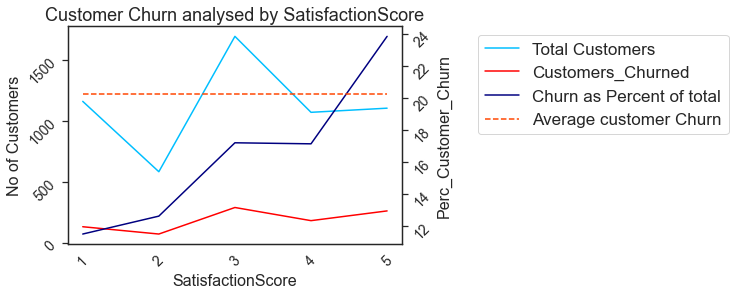

In [140]:
plot_churn('SatisfactionScore')
D['SatisfactionScore']

,MaritalStatus,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,Divorced,124,848,14.622642
1,Married,344,2986,11.520429
2,Single,480,1796,26.726058


<Figure size 3240x1080 with 0 Axes>

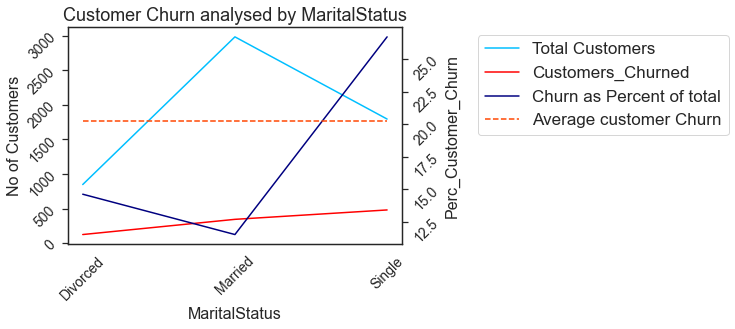

In [141]:
plot_churn('MaritalStatus')
D['MaritalStatus']

,NumberOfAddress,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,1.0,45,371,12.12938
1,2.0,241,1369,17.604091
2,3.0,228,1278,17.840376
3,4.0,65,588,11.054422
4,5.0,67,571,11.7338
5,6.0,66,382,17.277487
6,7.0,64,256,25.0
7,8.0,66,280,23.571429
8,9.0,46,239,19.246862
9,10.0,35,194,18.041237


<Figure size 3240x1080 with 0 Axes>

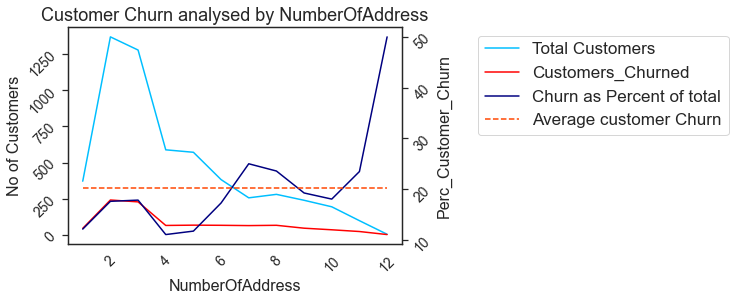

In [142]:
plot_churn('NumberOfAddress')
D['NumberOfAddress']

,Complain,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,0.0,440,4026,10.928962
1,1.0,508,1604,31.670823


<Figure size 3240x1080 with 0 Axes>

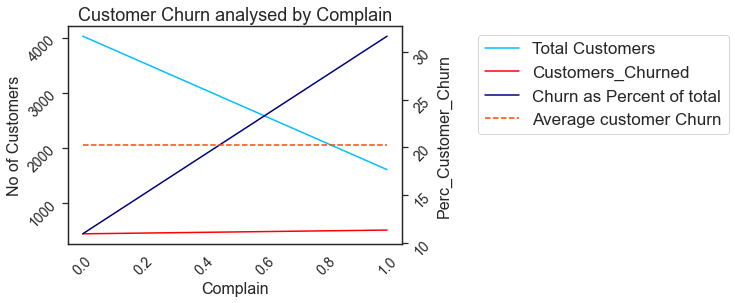

In [143]:
plot_churn('Complain')
D['Complain']

,OrderAmountHikeFromlastYear,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,11.00,82,391,20.971867
1,12.00,144,728,19.78022
2,13.00,128,741,17.273954
3,14.00,116,750,15.466667
4,15.00,82,542,15.129151
5,15.71,14,265,5.283019
6,16.00,64,333,19.219219
7,17.00,54,297,18.181818
8,18.00,54,321,16.82243
9,19.00,44,311,14.14791


<Figure size 3240x1080 with 0 Axes>

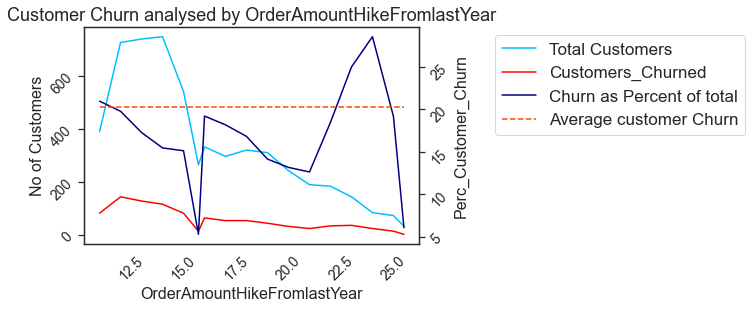

In [144]:
plot_churn('OrderAmountHikeFromlastYear')
D['OrderAmountHikeFromlastYear']

,CouponUsed,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,0.00,186,1030,18.058252
1,1.00,378,2105,17.957245
2,1.75,8,256,3.125
3,2.00,222,1283,17.303196
4,3.00,46,327,14.067278
5,3.50,108,629,17.170111


<Figure size 3240x1080 with 0 Axes>

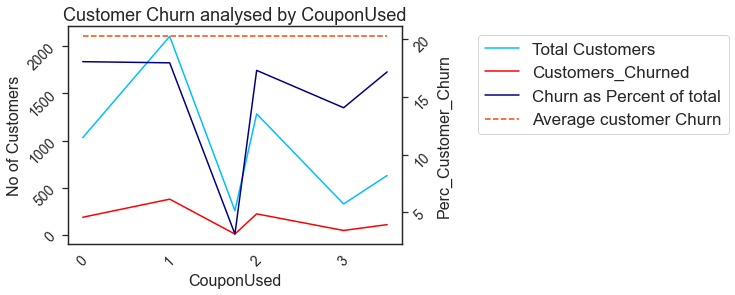

In [145]:
plot_churn('CouponUsed')
D['CouponUsed']

,OrderCount,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,1.000,316,1751,18.04683
1,2.000,370,2025,18.271605
2,3.000,68,371,18.328841
3,3.010,18,258,6.976744
4,4.000,28,204,13.72549
5,5.000,14,181,7.734807
6,6.000,16,137,11.678832
7,6.025,118,703,16.785206


<Figure size 3240x1080 with 0 Axes>

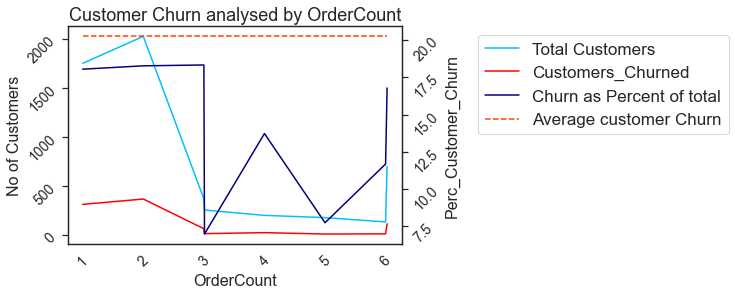

In [146]:
plot_churn('OrderCount')
D['OrderCount']

,DaySinceLastOrder,Customers_Churned,Total_Customers,Perc_Customer_Churn
0,0.00,170,496,34.274194
1,1.00,182,614,29.641694
2,2.00,122,792,15.40404
3,3.00,130,900,14.444444
4,4.00,58,431,13.457077
5,4.54,54,307,17.589577
6,5.00,28,228,12.280702
7,6.00,16,113,14.159292
8,7.00,65,447,14.541387
9,8.00,66,538,12.267658


<Figure size 3240x1080 with 0 Axes>

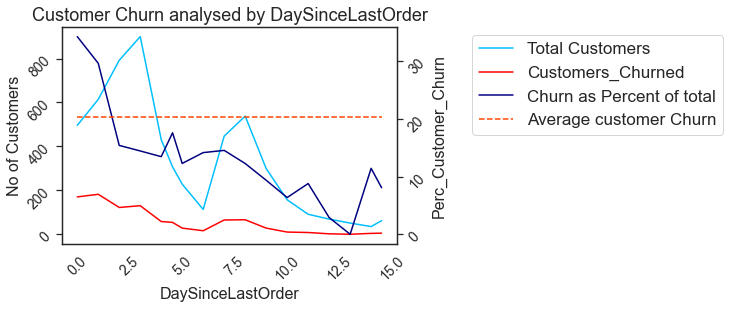

In [147]:
plot_churn('DaySinceLastOrder')
D['DaySinceLastOrder']

<AxesSubplot:xlabel='HourSpendOnApp', ylabel='OrderCount'>

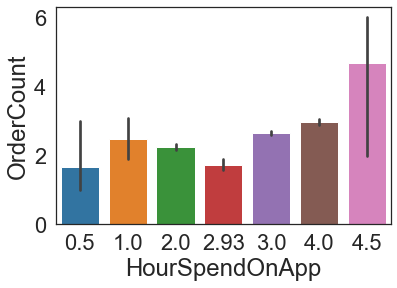

In [151]:
#bar plot to analyse the order count for the amount of hrs spend on app.
sns.barplot(df['HourSpendOnApp'],df['OrderCount'])

<AxesSubplot:xlabel='SatisfactionScore', ylabel='CashbackAmount'>

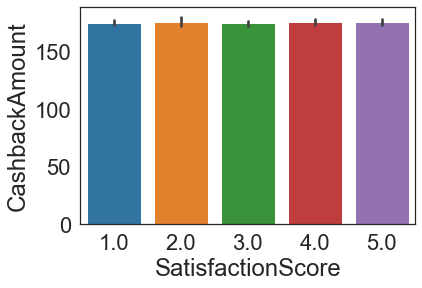

In [152]:
sns.barplot(df['SatisfactionScore'],df['CashbackAmount'])

<AxesSubplot:xlabel='Complain', ylabel='DaySinceLastOrder'>

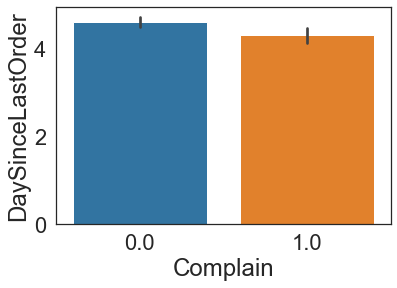

In [153]:
sns.barplot(df['Complain'],df['DaySinceLastOrder'])

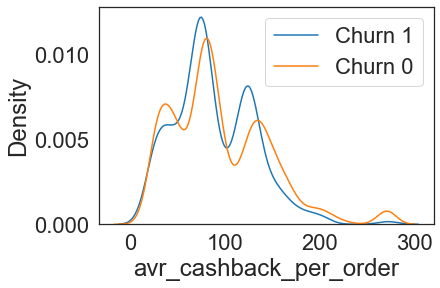

In [160]:
sns.distplot(df[df['Churn']==1]['avr_cashback_per_order'],hist=False,label='Churn 1')
sns.distplot(df[df['Churn']==0]['avr_cashback_per_order'],hist=False,label='Churn 0')
plt.legend(['Churn 1','Churn 0'])

<AxesSubplot:>

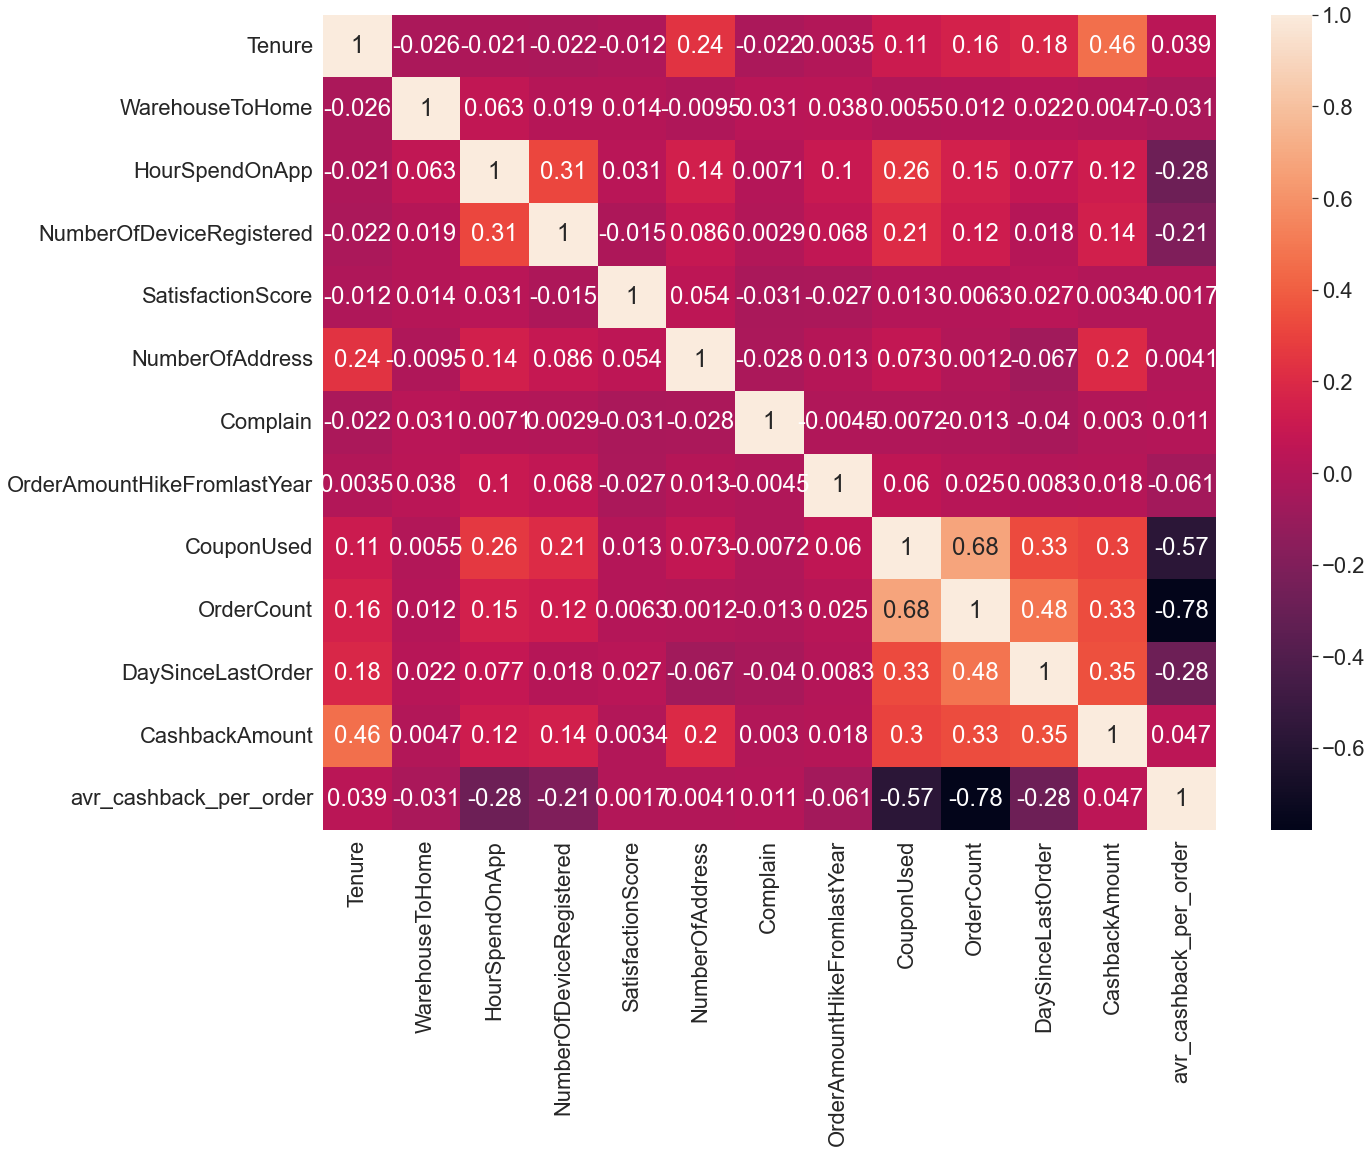

In [169]:
#heatmap for corr
plt.figure(figsize=(20,15))
sns.heatmap(df[num_col].corr(),annot=True)

In [168]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avr_cashback_per_order
0,1,4.00,Mobile Phone,3,6.0,Debit Card,Female,3.00,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,10.19,Other,1,8.0,UPI,Male,3.00,4.0,Mobile Accessories,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,10.19,Other,1,30.0,Debit Card,Male,2.00,4.0,Mobile Accessories,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.00,Other,3,15.0,Debit Card,Male,2.00,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.00,Other,1,12.0,CC,Male,2.93,3.0,Mobile Accessories,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


### One Hot Encoding - 

In [170]:
df_encoded=df.copy()

In [172]:
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avr_cashback_per_order
0,1,4.00,Mobile Phone,3,6.0,Debit Card,Female,3.00,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,10.19,Other,1,8.0,UPI,Male,3.00,4.0,Mobile Accessories,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,10.19,Other,1,30.0,Debit Card,Male,2.00,4.0,Mobile Accessories,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.00,Other,3,15.0,Debit Card,Male,2.00,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.00,Other,1,12.0,CC,Male,2.93,3.0,Mobile Accessories,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [174]:
#categorical to numerical transformation
df_encoded=pd.get_dummies(df_encoded,drop_first=True)
df_encoded.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.00,6.0,3.00,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,10.19,8.0,3.00,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,0,1,1,0,0,1,0,0,0,1
2,10.19,30.0,2.00,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,1
3,0.00,15.0,2.00,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,0.00,12.0,2.93,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1


### Feature Scaling - 

STD Scaler

In [176]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [181]:
scaled_df_encoded=df_encoded.copy()

In [182]:
scaled_df_encoded.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.00,6.0,3.00,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,10.19,8.0,3.00,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,0,1,1,0,0,1,0,0,0,1
2,10.19,30.0,2.00,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,1
3,0.00,15.0,2.00,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,0.00,12.0,2.93,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1


In [185]:
num_to_scale=scaled_df_encoded[num_col]
num_to_scale.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avr_cashback_per_order
0,4.00,6.0,3.00,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,10.19,8.0,3.00,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,10.19,30.0,2.00,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,0.00,15.0,2.00,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,0.00,12.0,2.93,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [187]:
#apply standard scaler on numerical column only.
num_to_scale=scaler.fit_transform(num_to_scale)
num_to_scale

array([[-0.74502254, -1.18883306,  0.09740293, ...,  0.14229568,
        -0.34934559,  1.30171943],
       [ 0.00194062, -0.9413639 ,  0.09740293, ..., -1.31896005,
        -1.23506443,  0.52630749],
       [ 0.00194062,  1.78079688, -1.32381906, ..., -0.44220661,
        -1.24913426,  0.5139899 ],
       ...,
       [-1.10704023, -0.57016016,  0.09740293, ..., -0.14995546,
         0.25179948, -0.02381182],
       [ 1.54775615, -0.81762932,  1.51862492, ...,  1.31130027,
         0.08114599, -0.09851202],
       [-0.26233229, -0.07522183,  0.09740293, ..., -0.44220661,
        -0.14260978, -0.1964567 ]])

In [188]:
scaled_df_encoded[num_col]=num_to_scale

In [189]:
scaled_df_encoded.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.745023,-1.188833,0.097403,-0.738345,-0.772992,1.875626,1.584290,-1.314493,-0.444061,-0.914826,...,0,0,0,0,1,0,0,0,0,1
1,0.001941,-0.941364,0.097403,0.323303,-0.048392,1.092812,1.584290,-0.196986,-1.379890,-0.914826,...,0,1,1,0,0,1,0,0,0,1
2,0.001941,1.780797,-1.323819,0.323303,-0.048392,0.701405,1.584290,-0.476363,-1.379890,-0.914826,...,0,0,1,0,0,1,0,0,0,1
3,-1.227713,-0.075222,-1.323819,0.323303,1.400807,1.484219,-0.631198,2.038030,-1.379890,-0.914826,...,0,0,1,0,1,0,0,0,0,1
4,-1.227713,-0.446426,-0.002083,-0.738345,1.400807,-0.472817,-0.631198,-1.314493,-0.444061,-0.914826,...,0,0,1,0,0,1,0,0,0,1


### Hierarchical Clustering - 

In [194]:
#import necessary libraries
from scipy.cluster.hierarchy import dendrogram,linkage 

In [195]:
#copy data to another variable
scaled_df_encoded_h=scaled_df_encoded.copy()

In [200]:
#calculating the linkages based on average method.
link_method=linkage(scaled_df_encoded_h,method='average')
link_method.shape

(5629, 4)

In [204]:
#label list for churn=0 &1
labellist=np.array(scaled_df_encoded_h['Churn_1'])
labellist

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

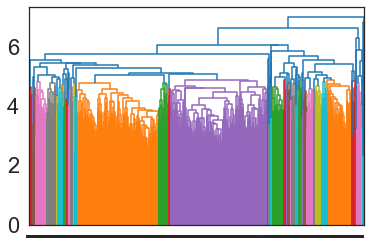

In [205]:
#plot dendrogram
#dend=dendrogram(link_method,labels=labellist)

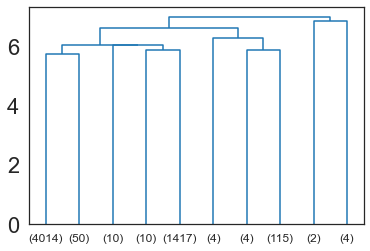

In [206]:
#plot dendogram for the last 10 linkages
dend=dendrogram(link_method,labels=labellist,truncate_mode='lastp',p=10)

In [207]:
from scipy.cluster.hierarchy import fcluster

In [212]:
#defining the clusters
clusters=fcluster(link_method,4,criterion='maxclust')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [213]:
scaled_df_encoded_h['H_Clusters']=clusters

In [214]:
scaled_df_encoded_h.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,H_Clusters
0,-0.745023,-1.188833,0.097403,-0.738345,-0.772992,1.875626,1.584290,-1.314493,-0.444061,-0.914826,...,0,0,0,1,0,0,0,0,1,1
1,0.001941,-0.941364,0.097403,0.323303,-0.048392,1.092812,1.584290,-0.196986,-1.379890,-0.914826,...,1,1,0,0,1,0,0,0,1,1
2,0.001941,1.780797,-1.323819,0.323303,-0.048392,0.701405,1.584290,-0.476363,-1.379890,-0.914826,...,0,1,0,0,1,0,0,0,1,1
3,-1.227713,-0.075222,-1.323819,0.323303,1.400807,1.484219,-0.631198,2.038030,-1.379890,-0.914826,...,0,1,0,1,0,0,0,0,1,1
4,-1.227713,-0.446426,-0.002083,-0.738345,1.400807,-0.472817,-0.631198,-1.314493,-0.444061,-0.914826,...,0,1,0,0,1,0,0,0,1,1


In [224]:
#summarizing the data of clusters based on median of each record
summ_data=scaled_df_encoded_h.groupby('H_Clusters').median()
summ_data['Freq_clust']=scaled_df_encoded_h['H_Clusters'].value_counts().sort_index()
summ_data

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Freq_clust
H_Clusters,,,,,,,,,,,,,,,,,,,,,
1,-0.141660,-0.198956,0.097403,0.323303,-0.048392,-0.472817,-0.631198,-0.196986,-0.444061,-0.332138,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5501
2,1.065066,-0.693895,-1.323819,-0.738345,-0.048392,-0.081410,-0.631198,0.001372,0.257810,-0.914826,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,123
3,2.090783,2.090133,-2.034430,-2.065405,-1.497592,-0.277114,1.584290,-0.516872,0.842703,1.124582,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,2.211455,0.605318,0.808014,-1.799993,0.676207,2.071330,-0.631198,-0.656561,0.257810,-0.040794,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4


In [226]:
#summarizing the data of clusters based on mean of each record
summ_data1=scaled_df_encoded_h.groupby('H_Clusters').mean()
summ_data1['Freq_clust']=scaled_df_encoded_h['H_Clusters'].value_counts().sort_index()
summ_data1

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Freq_clust
H_Clusters,,,,,,,,,,,,,,,,,,,,,
1,-0.024340,0.005768,0.015284,0.012104,0.000344,-0.003285,-0.005738,0.004000,0.002290,0.018273,...,0.071623,0.601709,0.065806,0.37266,0.147064,0.231049,0.035812,0.530085,0.319942,5501
2,0.982655,-0.311625,-0.676759,-0.453513,-0.013046,0.084063,0.251395,-0.149151,-0.128314,-0.834197,...,0.146341,0.569106,0.373984,0.00000,0.000000,0.000000,0.512195,0.569106,0.243902,123
3,2.090783,2.090133,-2.034430,-2.065405,-1.497592,-0.277114,1.584290,-0.516872,0.842703,1.124582,...,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2
4,2.211455,0.605318,0.808014,-1.667287,0.676207,2.071330,-0.631198,-0.656561,0.374788,-0.040794,...,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,4


In [227]:
df_h=df.copy()

In [228]:
df_h['Clusters']=scaled_df_encoded_h['H_Clusters']

In [229]:
df_h.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avr_cashback_per_order,Clusters
0,1,4.00,Mobile Phone,3,6.0,Debit Card,Female,3.00,3.0,Laptop & Accessory,...,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93,1
1,1,10.19,Other,1,8.0,UPI,Male,3.00,4.0,Mobile Accessories,...,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90,1
2,1,10.19,Other,1,30.0,Debit Card,Male,2.00,4.0,Mobile Accessories,...,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28,1
3,1,0.00,Other,3,15.0,Debit Card,Male,2.00,4.0,Laptop & Accessory,...,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07,1
4,1,0.00,Other,1,12.0,CC,Male,2.93,3.0,Mobile Accessories,...,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60,1


### K-Means Clustering -

In [230]:
scaled_df_encoded_k=scaled_df_encoded.copy()

In [237]:
from sklearn.cluster import KMeans

In [238]:
iner=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_df_encoded_k)
    kmi=kmeans.inertia_
    iner.append(kmi)
iner

[89242.3998223801,
 77519.57125697585,
 71276.32431918789,
 67691.94176547948,
 65519.27983452828,
 63456.00276574485,
 61863.487367133646,
 60403.923872826956,
 59305.60118323838,
 58317.47012135251,
 57548.96403220459,
 56546.89808112431,
 55730.53654309845,
 55012.82636971348,
 54450.49428912301,
 53870.12649786767,
 53255.60089996973,
 52594.998654994764,
 52190.69005484045]

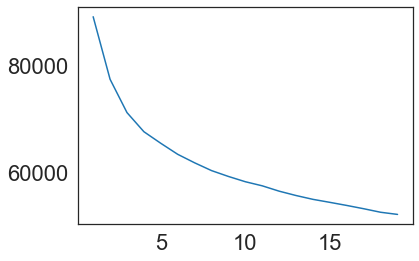

In [240]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),iner)

In [267]:
#From the above graph we can consider the elbow point at k=4. So considering the ideal value of K as 4.

kmeans=KMeans(n_clusters=4)
kmeans.fit(scaled_df_encoded_k)
labels=kmeans.labels_
set(labels)

{0, 1, 2, 3}

In [244]:
scaled_df_encoded_k['K_Clusters']=labels
scaled_df_encoded_k.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,K_Clusters
0,-0.745023,-1.188833,0.097403,-0.738345,-0.772992,1.875626,1.584290,-1.314493,-0.444061,-0.914826,...,0,0,0,1,0,0,0,0,1,3
1,0.001941,-0.941364,0.097403,0.323303,-0.048392,1.092812,1.584290,-0.196986,-1.379890,-0.914826,...,1,1,0,0,1,0,0,0,1,3
2,0.001941,1.780797,-1.323819,0.323303,-0.048392,0.701405,1.584290,-0.476363,-1.379890,-0.914826,...,0,1,0,0,1,0,0,0,1,3
3,-1.227713,-0.075222,-1.323819,0.323303,1.400807,1.484219,-0.631198,2.038030,-1.379890,-0.914826,...,0,1,0,1,0,0,0,0,1,3
4,-1.227713,-0.446426,-0.002083,-0.738345,1.400807,-0.472817,-0.631198,-1.314493,-0.444061,-0.914826,...,0,1,0,0,1,0,0,0,1,3


In [250]:
#summarizing the data of clusters based on median of each record

summ_datak=scaled_df_encoded_k.groupby('K_Clusters').median()
summ_datak['Freq']=scaled_df_encoded_k['K_Clusters'].value_counts().sort_index()
summ_datak

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Freq
K_Clusters,,,,,,,,,,,,,,,,,,,,,
0,0.099685,-0.322691,0.097403,0.323303,-0.048392,-0.472817,-0.631198,-0.196986,1.427596,2.013181,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1208
1,-0.503677,-0.075222,0.097403,0.323303,-0.048392,-0.472817,-0.631198,-0.196986,0.491767,-0.332138,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1861
2,1.427084,-0.446426,0.097403,0.323303,-0.048392,0.309997,-0.631198,0.001372,0.257810,-0.332138,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,693
3,-0.262332,-0.198956,-1.323819,-0.738345,-0.048392,-0.864224,-0.631198,-0.476363,-0.444061,-0.914826,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1868


In [259]:
#summarizing the data of clusters based on mean of each record

summ_datak1=scaled_df_encoded_k.groupby('K_Clusters').mean()
summ_datak1['Freq']=scaled_df_encoded_k['K_Clusters'].value_counts().sort_index()
summ_datak1

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Freq
K_Clusters,,,,,,,,,,,,,,,,,,,,,
0,0.187720,0.013146,0.046860,0.025813,0.000794,-0.165329,-0.044313,-0.023314,1.186279,1.642506,...,0.065397,0.575331,0.118377,0.385762,0.056291,0.096854,0.082781,0.573675,0.262417,1208
1,-0.351871,0.074394,0.692109,0.579445,0.010012,0.189904,0.017615,0.166009,0.099031,-0.199864,...,0.072542,0.616335,0.001075,0.401397,0.016658,0.493821,0.000000,0.506717,0.355185,1861
2,1.405666,-0.067366,-0.177408,-0.062751,-0.024344,0.476049,0.062541,-0.057011,-0.053795,-0.158164,...,0.075036,0.546898,0.379509,0.096681,0.000000,0.004329,0.236652,0.572872,0.230880,693
3,-0.292323,-0.057625,-0.654004,-0.570687,-0.001456,-0.258884,-0.012094,-0.129160,-0.845846,-0.804386,...,0.079229,0.622591,0.001071,0.412206,0.380086,0.124197,0.000000,0.510171,0.352248,1868


### Handling Imbalanced Data -

In [268]:
#We are using the data of kmeans clustering for the model building.
scaled_df_encoded_k.sample(5)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,K_Clusters
3377,-0.020987,-0.817629,1.518625,0.323303,-0.048392,0.701405,-0.631198,1.758653,1.427596,0.833238,...,0,1,0,0,0,1,0,0,1,0
1825,0.001941,0.295982,0.097403,0.323303,1.400807,-0.864224,-0.631198,0.641145,-0.444061,-0.914826,...,0,1,0,0,1,0,0,1,0,3
3262,-0.865695,2.275735,1.518625,0.323303,-0.048392,0.701405,-0.631198,-0.755739,0.491767,-0.332138,...,0,0,0,1,0,0,0,0,0,1
5434,-0.624350,2.523204,1.518625,1.384951,-1.497592,-0.472817,-0.631198,-0.196986,-0.444061,1.998614,...,0,0,0,1,0,0,0,1,0,0
4156,0.341031,-0.322691,0.097403,1.384951,1.400807,0.701405,-0.631198,0.082391,0.491767,-0.332138,...,0,1,0,0,0,0,0,1,0,2


In [269]:
#converted cluster column into object.
scaled_df_encoded_k['K_Clusters']=scaled_df_encoded_k['K_Clusters'].astype('object')

In [270]:
#label encoding of clusters.
scaled_df_encoded_k1=pd.get_dummies(scaled_df_encoded_k,drop_first=True)
scaled_df_encoded_k1.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,K_Clusters_1,K_Clusters_2,K_Clusters_3
0,-0.745023,-1.188833,0.097403,-0.738345,-0.772992,1.875626,1.584290,-1.314493,-0.444061,-0.914826,...,0,1,0,0,0,0,1,0,0,1
1,0.001941,-0.941364,0.097403,0.323303,-0.048392,1.092812,1.584290,-0.196986,-1.379890,-0.914826,...,0,0,1,0,0,0,1,0,0,1
2,0.001941,1.780797,-1.323819,0.323303,-0.048392,0.701405,1.584290,-0.476363,-1.379890,-0.914826,...,0,0,1,0,0,0,1,0,0,1
3,-1.227713,-0.075222,-1.323819,0.323303,1.400807,1.484219,-0.631198,2.038030,-1.379890,-0.914826,...,0,1,0,0,0,0,1,0,0,1
4,-1.227713,-0.446426,-0.002083,-0.738345,1.400807,-0.472817,-0.631198,-1.314493,-0.444061,-0.914826,...,0,0,1,0,0,0,1,0,0,1


In [271]:
#defined x&y
x=scaled_df_encoded_k1.drop('Churn_1',axis=1)
y=scaled_df_encoded_k1['Churn_1']

In [272]:
scaled_df_encoded_k1['Churn_1'].value_counts()

0    4682
1     948
Name: Churn_1, dtype: int64

### Balancinf the data using SMOTE -

We can observe here the data is highly imbalanced. We need to first balance the data before moving towards model building.

In [275]:
#Balancing the data using SMOTE

from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [276]:
x_sm,y_sm=smote.fit_resample(x,y)

In [279]:
#We can observe here our data has completely balanced.
y_sm.value_counts()

1    4682
0    4682
Name: Churn_1, dtype: int64

In [283]:
scaled_df_encoded_k1_smote=pd.concat([x_sm,y_sm],axis=1)
scaled_df_encoded_k1_smote.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Accessories,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,K_Clusters_1,K_Clusters_2,K_Clusters_3,Churn_1
0,-0.745023,-1.188833,0.097403,-0.738345,-0.772992,1.875626,1.584290,-1.314493,-0.444061,-0.914826,...,1,0,0,0,0,1,0,0,1,1
1,0.001941,-0.941364,0.097403,0.323303,-0.048392,1.092812,1.584290,-0.196986,-1.379890,-0.914826,...,0,1,0,0,0,1,0,0,1,1
2,0.001941,1.780797,-1.323819,0.323303,-0.048392,0.701405,1.584290,-0.476363,-1.379890,-0.914826,...,0,1,0,0,0,1,0,0,1,1
3,-1.227713,-0.075222,-1.323819,0.323303,1.400807,1.484219,-0.631198,2.038030,-1.379890,-0.914826,...,1,0,0,0,0,1,0,0,1,1
4,-1.227713,-0.446426,-0.002083,-0.738345,1.400807,-0.472817,-0.631198,-1.314493,-0.444061,-0.914826,...,0,1,0,0,0,1,0,0,1,1


## Building Classification Models- 

#### Train Test Split - 

In [284]:
x=scaled_df_encoded_k1_smote.drop('Churn_1',axis=1)
y=scaled_df_encoded_k1_smote['Churn_1']

In [285]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=18)

### 1. Logistic Regression - 

In [286]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()

In [287]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [288]:
#performance matrix of Logistic Regression Model on Training Data - 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Accuracy score on Training Data is 0.853054250320376

Classification Report on the Training Data -
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3513
           1       0.85      0.86      0.85      3510

    accuracy                           0.85      7023
   macro avg       0.85      0.85      0.85      7023
weighted avg       0.85      0.85      0.85      7023



<AxesSubplot:>

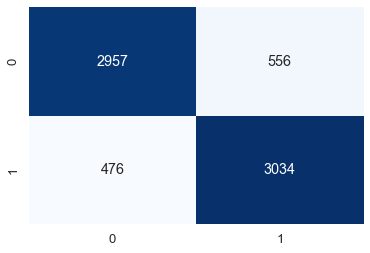

In [297]:
#Model Evaluation on Training Data -

#Prediction on Training Data
lreg_y_pred_train=lreg.predict(x_train)

#Accuracy score of the training data
accuracy_score_lreg_train=accuracy_score(y_train,lreg_y_pred_train)
print("Accuracy score on Training Data is {}".format(accuracy_score_lreg_train))
print()

#classification report on training data
print('Classification Report on the Training Data -')
print(classification_report(y_train,lreg_y_pred_train))

#confusion matrix for the training data
cm_lreg=confusion_matrix(y_train,lreg_y_pred_train)
sns.set(font_scale = 1.2)
sns.heatmap(cm_lreg,annot=True,fmt = 'd',cmap='Blues',cbar=False)


In [309]:
from sklearn.metrics import roc_auc_score,roc_curve

The ROC AUC score for training data id 0.93065090753676


Text(0, 0.5, 'Train TPR')

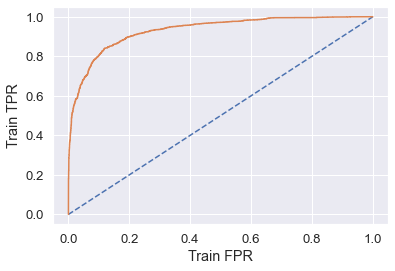

In [310]:
# ROC AUC Curve analysis on Training Data - 


#calculating the probability of output on training data
probs=lreg.predict_proba(x_train)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on training data
auc_score=roc_auc_score(y_train,probs)
print('The ROC AUC score for training data id {}'.format(auc_score))

#roc curve on training data
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)
plt.xlabel('Train FPR')
plt.ylabel('Train TPR')

Accuracy score on Testing Data is 0.8436565570269116

Classification Report on the testing Data -
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1169
           1       0.85      0.84      0.84      1172

    accuracy                           0.84      2341
   macro avg       0.84      0.84      0.84      2341
weighted avg       0.84      0.84      0.84      2341



<AxesSubplot:>

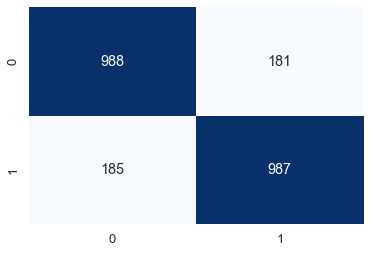

In [311]:
#Model Evaluation on Testing Data -

#Prediction on Testing Data
lreg_y_pred_test=lreg.predict(x_test)

#Accuracy score of the Testing data
accuracy_score_lreg_test=accuracy_score(y_test,lreg_y_pred_test)
print("Accuracy score on Testing Data is {}".format(accuracy_score_lreg_test))
print()

#classification report on testing data
print('Classification Report on the testing Data -')
print(classification_report(y_test,lreg_y_pred_test))

#confusion matrix for the testing data
cm_lreg=confusion_matrix(y_test,lreg_y_pred_test)
sns.set(font_scale = 1.2)
sns.heatmap(cm_lreg,annot=True,fmt = 'd',cmap='Blues',cbar=False)


The ROC AUC score for testing data id 0.9291713987918848


Text(0, 0.5, 'Test TPR')

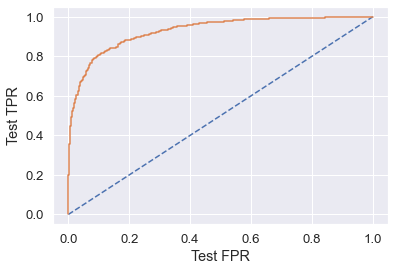

In [312]:
# ROC AUC Curve analysis on Testing Data - 


#calculating the probability of output on Testing data
probs=lreg.predict_proba(x_test)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on testing data
auc_score=roc_auc_score(y_test,probs)
print('The ROC AUC score for testing data id {}'.format(auc_score))

#roc curve on training data
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr)
plt.xlabel('Test FPR')
plt.ylabel('Test TPR')

### 2. Decision Tree - 

In [314]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [315]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

Accuracy score on Training Data is 1.0

Classification Report on the Training Data -
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3513
           1       1.00      1.00      1.00      3510

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023



<AxesSubplot:>

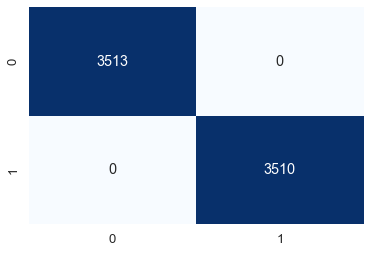

In [317]:
#Model Evaluation on Training Data -

#Prediction on Training Data
dt_y_pred_train=dt.predict(x_train)

#Accuracy score of the training data
accuracy_score_dt_train=accuracy_score(y_train,dt_y_pred_train)
print("Accuracy score on Training Data is {}".format(accuracy_score_dt_train))
print()

#classification report on training data
print('Classification Report on the Training Data -')
print(classification_report(y_train,dt_y_pred_train))

#confusion matrix for the training data
cm_dt=confusion_matrix(y_train,dt_y_pred_train)
sns.set(font_scale = 1.2)
sns.heatmap(cm_dt,annot=True,fmt = 'd',cmap='Blues',cbar=False)


The ROC AUC score for training data id 1.0


Text(0, 0.5, 'Train TPR')

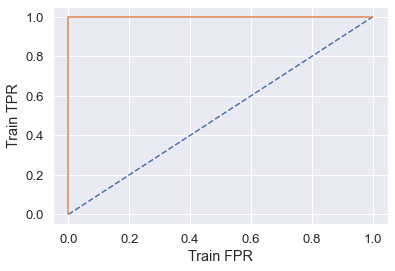

In [319]:
# ROC AUC Curve analysis on Training Data - 


#calculating the probability of output on training data
probs=dt.predict_proba(x_train)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on training data
auc_score=roc_auc_score(y_train,probs)
print('The ROC AUC score for training data id {}'.format(auc_score))

#roc curve on training data
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)
plt.xlabel('Train FPR')
plt.ylabel('Train TPR')

Accuracy score on Testing Data is 0.9504485262708244

Classification Report on the testing Data -
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1169
           1       0.95      0.96      0.95      1172

    accuracy                           0.95      2341
   macro avg       0.95      0.95      0.95      2341
weighted avg       0.95      0.95      0.95      2341



<AxesSubplot:>

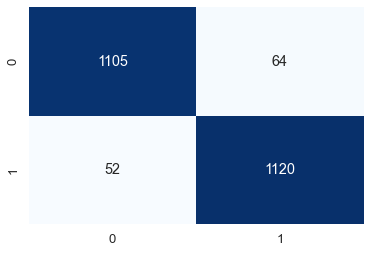

In [318]:
#Model Evaluation on Testing Data -

#Prediction on Testing Data
dt_y_pred_test=dt.predict(x_test)

#Accuracy score of the Testing data
accuracy_score_dt_test=accuracy_score(y_test,dt_y_pred_test)
print("Accuracy score on Testing Data is {}".format(accuracy_score_dt_test))
print()

#classification report on testing data
print('Classification Report on the testing Data -')
print(classification_report(y_test,dt_y_pred_test))

#confusion matrix for the testing data
cm_dt=confusion_matrix(y_test,dt_y_pred_test)
sns.set(font_scale = 1.2)
sns.heatmap(cm_dt,annot=True,fmt = 'd',cmap='Blues',cbar=False)


The ROC AUC score for testing data id 0.9504418758776937


Text(0, 0.5, 'Test TPR')

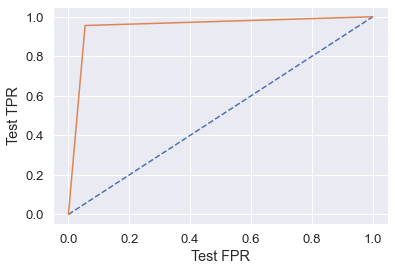

In [320]:
# ROC AUC Curve analysis on Testing Data - 


#calculating the probability of output on Testing data
probs=dt.predict_proba(x_test)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on testing data
auc_score=roc_auc_score(y_test,probs)
print('The ROC AUC score for testing data id {}'.format(auc_score))

#roc curve on training data
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr)
plt.xlabel('Test FPR')
plt.ylabel('Test TPR')

### 3. Random Forest Classifier - 

In [321]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=42)

In [322]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

Accuracy score on Training Data is 1.0

Classification Report on the Training Data -
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3513
           1       1.00      1.00      1.00      3510

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023



<AxesSubplot:>

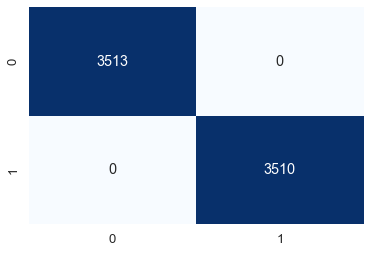

In [323]:
#Model Evaluation on Training Data -

#Prediction on Training Data
rfc_y_pred_train=rfc.predict(x_train)

#Accuracy score of the training data
accuracy_score_rfc_train=accuracy_score(y_train,rfc_y_pred_train)
print("Accuracy score on Training Data is {}".format(accuracy_score_rfc_train))
print()

#classification report on training data
print('Classification Report on the Training Data -')
print(classification_report(y_train,rfc_y_pred_train))

#confusion matrix for the training data
cm_rfc=confusion_matrix(y_train,rfc_y_pred_train)
sns.set(font_scale = 1.2)
sns.heatmap(cm_rfc,annot=True,fmt = 'd',cmap='Blues',cbar=False)


The ROC AUC score for training data id 1.0


Text(0, 0.5, 'Train TPR')

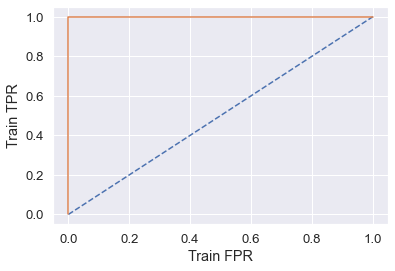

In [324]:
# ROC AUC Curve analysis on Training Data - 


#calculating the probability of output on training data
probs=rfc.predict_proba(x_train)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on training data
auc_score=roc_auc_score(y_train,probs)
print('The ROC AUC score for training data id {}'.format(auc_score))

#roc curve on training data
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)
plt.xlabel('Train FPR')
plt.ylabel('Train TPR')

Accuracy score on Testing Data is 0.9504485262708244

Classification Report on the testing Data -
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1169
           1       0.95      0.96      0.95      1172

    accuracy                           0.95      2341
   macro avg       0.95      0.95      0.95      2341
weighted avg       0.95      0.95      0.95      2341



<AxesSubplot:>

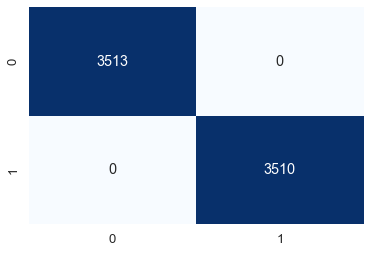

In [325]:
#Model Evaluation on Testing Data -

#Prediction on Testing Data
rfc_y_pred_test=dt.predict(x_test)

#Accuracy score of the Testing data
accuracy_score_rfc_test=accuracy_score(y_test,rfc_y_pred_test)
print("Accuracy score on Testing Data is {}".format(accuracy_score_rfc_test))
print()

#classification report on testing data
print('Classification Report on the testing Data -')
print(classification_report(y_test,rfc_y_pred_test))

#confusion matrix for the testing data
cm_dt=confusion_matrix(y_test,rfc_y_pred_test)
sns.set(font_scale = 1.2)
sns.heatmap(cm_rfc,annot=True,fmt = 'd',cmap='Blues',cbar=False)


The ROC AUC score for testing data id 0.9985778078168382


Text(0, 0.5, 'Test TPR')

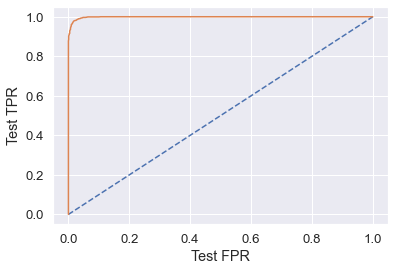

In [326]:
# ROC AUC Curve analysis on Testing Data - 


#calculating the probability of output on Testing data
probs=rfc.predict_proba(x_test)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on testing data
auc_score=roc_auc_score(y_test,probs)
print('The ROC AUC score for testing data id {}'.format(auc_score))

#roc curve on training data
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr)
plt.xlabel('Test FPR')
plt.ylabel('Test TPR')

### 4. KNN Classifier - 

In [327]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [328]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

Accuracy score on Training Data is 0.9483126868859462

Classification Report on the Training Data -
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3513
           1       0.91      1.00      0.95      3510

    accuracy                           0.95      7023
   macro avg       0.95      0.95      0.95      7023
weighted avg       0.95      0.95      0.95      7023



<AxesSubplot:>

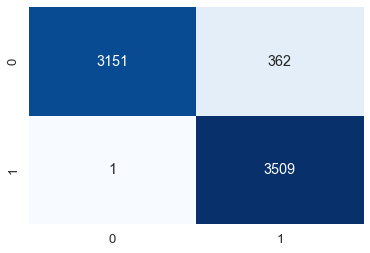

In [329]:
#Model Evaluation on Training Data -

#Prediction on Training Data
knn_y_pred_train=knn.predict(x_train)

#Accuracy score of the training data
accuracy_score_knn_train=accuracy_score(y_train,knn_y_pred_train)
print("Accuracy score on Training Data is {}".format(accuracy_score_knn_train))
print()

#classification report on training data
print('Classification Report on the Training Data -')
print(classification_report(y_train,knn_y_pred_train))

#confusion matrix for the training data
cm_knn=confusion_matrix(y_train,knn_y_pred_train)
sns.set(font_scale = 1.2)
sns.heatmap(cm_knn,annot=True,fmt = 'd',cmap='Blues',cbar=False)


The ROC AUC score for training data id 0.9995679052895108


Text(0, 0.5, 'Train TPR')

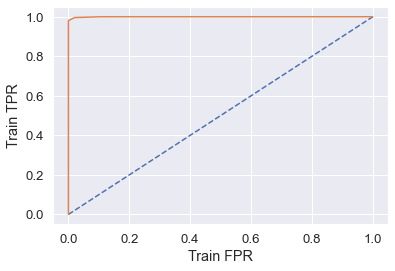

In [331]:
# ROC AUC Curve analysis on Training Data - 


#calculating the probability of output on training data
probs=knn.predict_proba(x_train)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on training data
auc_score=roc_auc_score(y_train,probs)
print('The ROC AUC score for training data id {}'.format(auc_score))

#roc curve on training data
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)
plt.xlabel('Train FPR')
plt.ylabel('Train TPR')

Accuracy score on Testing Data is 0.9196924391285776

Classification Report on the testing Data -
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1169
           1       0.86      1.00      0.93      1172

    accuracy                           0.92      2341
   macro avg       0.93      0.92      0.92      2341
weighted avg       0.93      0.92      0.92      2341



<AxesSubplot:>

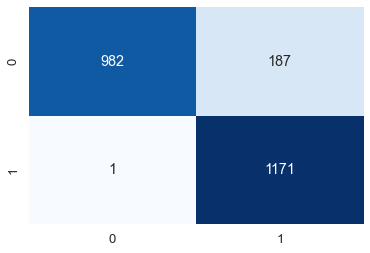

In [343]:
#Model Evaluation on Testing Data -

#Prediction on Testing Data
knn_y_pred_test=knn.predict(x_test)

#Accuracy score of the Testing data
accuracy_score_knn_test=accuracy_score(y_test,knn_y_pred_test)
print("Accuracy score on Testing Data is {}".format(accuracy_score_knn_test))
print()

#classification report on testing data
print('Classification Report on the testing Data -')
print(classification_report(y_test,knn_y_pred_test))

#confusion matrix for the testing data
cm_knn=confusion_matrix(y_test,knn_y_pred_test)
sns.set(font_scale = 1.2)
sns.heatmap(cm_knn,annot=True,fmt = 'd',cmap='Blues',cbar=False)


The ROC AUC score for testing data id 0.9899410102272295


Text(0, 0.5, 'Test TPR')

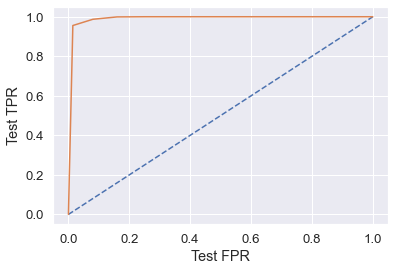

In [344]:
# ROC AUC Curve analysis on Testing Data - 


#calculating the probability of output on Testing data
probs=knn.predict_proba(x_test)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on testing data
auc_score=roc_auc_score(y_test,probs)
print('The ROC AUC score for testing data id {}'.format(auc_score))

#roc curve on training data
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr)
plt.xlabel('Test FPR')
plt.ylabel('Test TPR')

### 5. XGBoost Classifier - 

In [338]:
import xgboost as xgb
xbc=xgb.XGBClassifier(learning_rate=0.1,random_state=42)

In [339]:
xbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

Accuracy score on Training Data is 0.9907446959988608

Classification Report on the Training Data -
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3513
           1       0.99      0.99      0.99      3510

    accuracy                           0.99      7023
   macro avg       0.99      0.99      0.99      7023
weighted avg       0.99      0.99      0.99      7023



<AxesSubplot:>

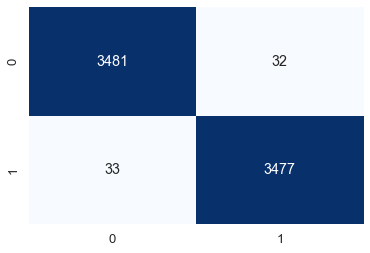

In [341]:
#Model Evaluation on Training Data -

#Prediction on Training Data
xbc_y_pred_train=xbc.predict(x_train)

#Accuracy score of the training data
accuracy_score_xbc_train=accuracy_score(y_train,xbc_y_pred_train)
print("Accuracy score on Training Data is {}".format(accuracy_score_xbc_train))
print()

#classification report on training data
print('Classification Report on the Training Data -')
print(classification_report(y_train,xbc_y_pred_train))

#confusion matrix for the training data
cm_xbc=confusion_matrix(y_train,xbc_y_pred_train)
sns.set(font_scale = 1.2)
sns.heatmap(cm_xbc,annot=True,fmt = 'd',cmap='Blues',cbar=False)


The ROC AUC score for training data id 0.9995107305952737


Text(0, 0.5, 'Train TPR')

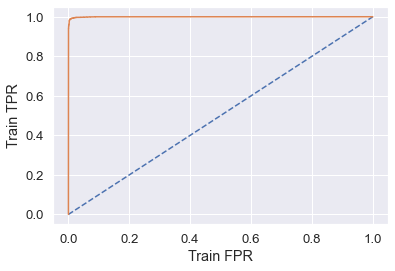

In [342]:
# ROC AUC Curve analysis on Training Data - 


#calculating the probability of output on training data
probs=xbc.predict_proba(x_train)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on training data
auc_score=roc_auc_score(y_train,probs)
print('The ROC AUC score for training data id {}'.format(auc_score))

#roc curve on training data
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)
plt.xlabel('Train FPR')
plt.ylabel('Train TPR')

Accuracy score on Testing Data is 0.961982058949167

Classification Report on the testing Data -
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1169
           1       0.97      0.95      0.96      1172

    accuracy                           0.96      2341
   macro avg       0.96      0.96      0.96      2341
weighted avg       0.96      0.96      0.96      2341



<AxesSubplot:>

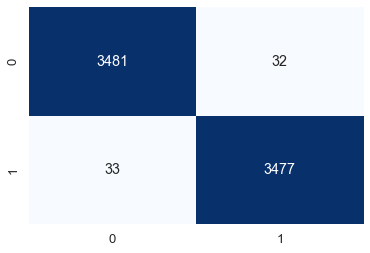

In [345]:
#Model Evaluation on Testing Data -

#Prediction on Testing Data
xbc_y_pred_test=xbc.predict(x_test)

#Accuracy score of the Testing data
accuracy_score_xbc_test=accuracy_score(y_test,xbc_y_pred_test)
print("Accuracy score on Testing Data is {}".format(accuracy_score_xbc_test))
print()

#classification report on testing data
print('Classification Report on the testing Data -')
print(classification_report(y_test,xbc_y_pred_test))

#confusion matrix for the testing data
cm_knn=confusion_matrix(y_test,xbc_y_pred_test)
sns.set(font_scale = 1.2)
sns.heatmap(cm_xbc,annot=True,fmt = 'd',cmap='Blues',cbar=False)


The ROC AUC score for testing data id 0.9941097814123093


Text(0, 0.5, 'Test TPR')

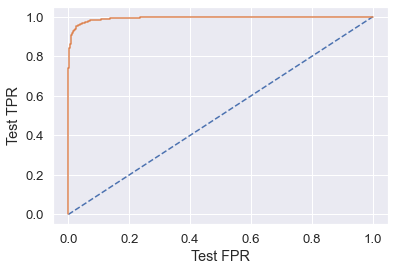

In [346]:
# ROC AUC Curve analysis on Testing Data - 


#calculating the probability of output on Testing data
probs=xbc.predict_proba(x_test)
probs=probs[:,1] #selected probabilities for positive outcome

#auc score on testing data
auc_score=roc_auc_score(y_test,probs)
print('The ROC AUC score for testing data id {}'.format(auc_score))

#roc curve on training data
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,probs)

#plot ROC Curve
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr)
plt.xlabel('Test FPR')
plt.ylabel('Test TPR')